<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/korea/blob/main/simple_EDA_korea_income_and_welfare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 100

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
job_code = pd.read_excel('/content/drive/MyDrive/한국분석/job_code_translated.xlsx')
df = pd.read_csv('/content/drive/MyDrive/한국분석/Korea Income and Welfare.csv')
df

id  year  wave  region   income  family_member  gender  \
0         10101  2005     1       1    614.0              1       2   
1         10101  2011     7       1    896.0              1       2   
2         10101  2012     8       1   1310.0              1       2   
3         10101  2013     9       1   2208.0              1       2   
4         10101  2014    10       1    864.0              1       2   
...         ...   ...   ...     ...      ...            ...     ...   
92852  98000701  2014    10       5  11600.0              6       1   
92853  98000701  2015    11       5   8327.0              6       1   
92854  98000701  2016    12       5   7931.0              6       1   
92855  98000701  2017    13       5   8802.0              5       1   
92856  98000701  2018    14       5   6747.0              6       1   

       year_born  education_level  marriage  religion occupation company_size  \
0           1936                2         2         2                           
1           1936                2         2         2                           
2           1936                2         2         2                           
3           1936                2         2         2                           
4           1936                2         2         2                           
...          ...              ...       ...       ...        ...          ...   
92852       1967                5         1         1        874            1   
92853       1967                5         1         1        874            1   
92854       1967                5         1         1        874            1   
92855       1967                5         1         1        874            1   
92856       1967                5         1         1        874            1   

      reason_none_worker  
0                      8  
1                     10  
2                     10  
3                      1  
4                     10  
...                  ...  
92852                     
92853                     
92854                     
92855                     
92856                     

[92857 rows x 14 columns]

In [5]:
# fill with previous values
job_code.fillna(method='pad', inplace=True)

<ipython-input-5-ca14c4db4772>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  job_code.fillna(method='pad', inplace=True)


In [6]:
# Merge job_code, df
df['occupation'] = df['occupation'].replace({' ': 0}).astype(int)
df = pd.merge(df, job_code, left_on='occupation',
              right_on='job_code',  how='left')

In [7]:
# Creating & Editing Features

# Creating
# getting job
df['job_code'] = df['job_code'].fillna(0)
df['getting job'] = df['job_code'].map(lambda x: 1 if x != 0 else x)
df['age'] = np.round(2021 - df['year_born'])

# Editing
# Family member
df['family_member'] = df['family_member'].map(lambda x: x
                                              if x in [1, 2, 3, 4] else '5+')

To understand instance meanings, let's change number to meaning.

In [8]:
# region
df.loc[:, 'region'] = df['region'].replace({
    1: 'Seoul',
    2: 'Kyeong-gi',
    3: 'Kyoung-nam',
    4: 'Kyoung-buk',
    5: 'Chung-nam',
    6: 'Gang-won/Chung-buk',
    7: 'Jeolla/Jeju'
})
# gender
df.loc[:, 'gender'] = df['gender'].replace({1: 'male', 2: 'female'})

# education_level
df.loc[:, 'education_level'] = df['education_level'].replace({
    1:
    'no education(<7)',
    2:
    'no education(>=7)',
    3:
    'elementary',
    4:
    'middle school',
    5:
    'high school',
    6:
    'college',
    7:
    'university degree',
    8:
    'MA',
    9:
    'doctoral degree'
})
# marriage
df.loc[:, 'marriage'] = df['marriage'].replace({
    1: 'not applicable(<18)',
    2: 'married',
    3: 'separated by death',
    4: 'separated',
    5: 'not married yet',
    6: 'others'
})

# religion
df.loc[:, 'religion'] = df['religion'].replace({
    1: 'have religion',
    2: 'do not have'
})

df.loc[:, 'reason_none_worker'] = df['reason_none_worker'].replace({
    '1':
    'no capable',
    '2':
    'in military service',
    '3':
    'studying in school',
    '4':
    'prepare for school',
    '5':
    'prepare to apply job',
    '6':
    'house worker',
    '7':
    'caring kids at home',
    '8':
    'nursing',
    '9':
    'giving-up economic activities',
    '10':
    'no intention to work',
    '11':
    'others'
})

df['Main_category'] = df['대분류'].replace({
    '1 관리자': 'Manager',
    '2 전문가 및 관련 종사자': 'Expert and related worker',
    '3 사무 종사자': 'Office worker',
    '4 서비스 종사자': 'Service worker',
    '5 판매 종사자': 'Sales worker',
    '6 농림어업 숙련 종사자': 'Skilled worker in agriculture, forestry and fisheries',
    '7 기능원 및 관련 기능 종사자': 'Craftsmen and related skilled workers',
    '8 장치ㆍ기계 조작 및 조립 종사자':
    'Equipment and machine operation and assembly workers',
    '9 단순노무 종사자': 'Simple labor worker',
    'A 군인': 'Soldier'
})

# df['reason_none_worker'] = df['reason_none_worker'].replace({' ' : np.nan, '99' : np.nan, '0' : np.nan})

# About Visualization

There are many way and tools to visualize data, such as Seaborn, Plotly and so on.   
Especially, Seaborn is very commom, useful and easy way to draw plot.  


But I personally prefer to draw plot manually although this way takes more time to visualize than tools like seaborn surely.  
Because it helps me to understand data structure and I can show customizing graph.




# EDA for Korea income and welfare  

Let's have a look 3-years data(2005, 2012, 2018) to observe changes for few year.  
I focused on regional differences because of centralization of the metropolitan area, especially Seoul.  


<ipython-input-9-4e1afd668aa0>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(region_man.index, rotation=90)
<ipython-input-9-4e1afd668aa0>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(region_man.index, rotation=90)
<ipython-input-9-4e1afd668aa0>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(region_man.index, rotation=90)


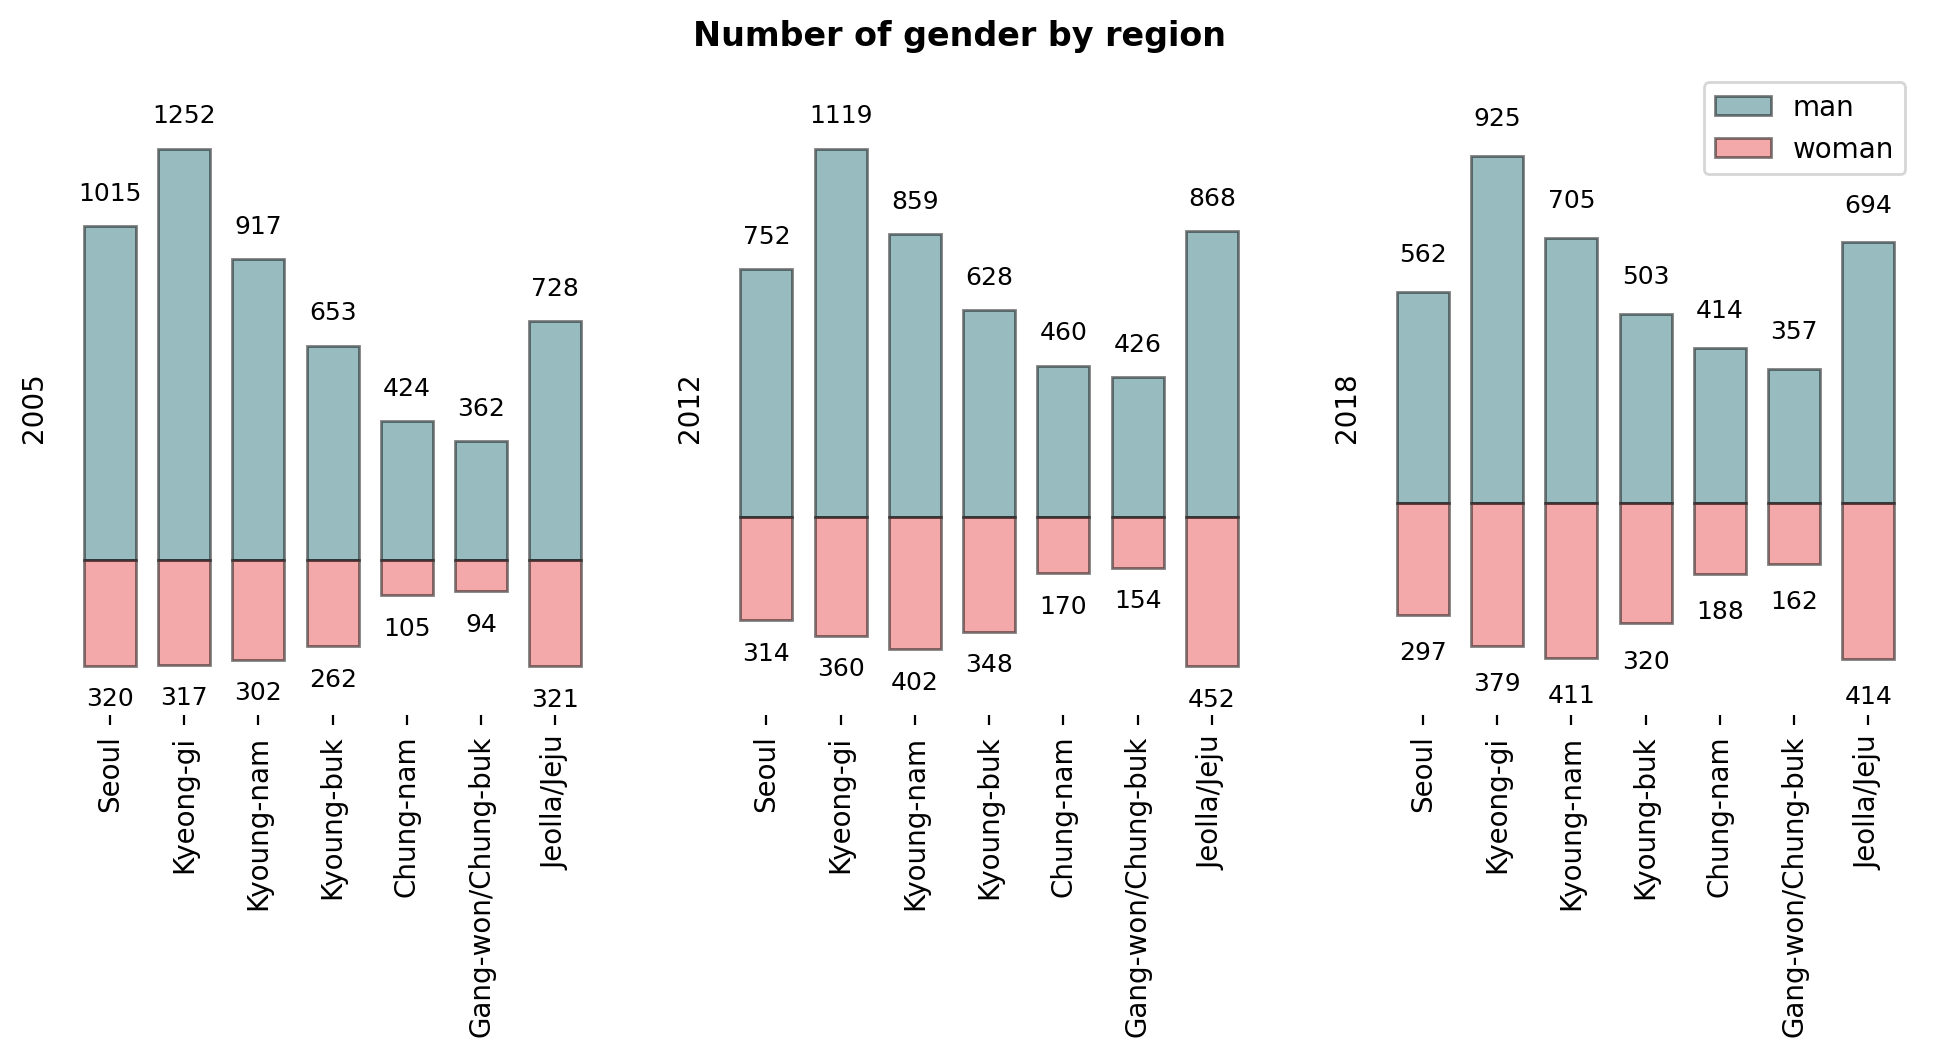

In [9]:
# 3-years data(2005, 2012, 2018)

region_order = ['Seoul', 'Kyeong-gi', 'Kyoung-nam', 'Kyoung-buk',
                'Chung-nam', 'Gang-won/Chung-buk', 'Jeolla/Jeju']


def plot_gender(in_df, region_order, ax):

    region_man = in_df[in_df['gender'] == 'male']['region'].value_counts()[
        region_order]
    region_woman = in_df[in_df['gender'] == 'female']['region'].value_counts()[
        region_order]

    ax.bar(region_man.index, region_man, width=0.7,
           edgecolor='black', color='#337882', alpha=0.5, label='man')
    ax.bar(region_woman.index, -region_woman, width=0.7,
           edgecolor='black', color='#e85255', alpha=0.5, label='woman')

    # Annotation

    for idx in region_man.index:
        # Man
        ax.annotate(f"{region_man[idx]}",
                    xy=(idx, region_man[idx] + 100),
                    va='center',
                    ha='center',
                    fontweight='light',
                    fontsize=9)
        # Woman
        ax.annotate(f"{region_woman[idx]}",
                    xy=(idx, -region_woman[idx] - 100),
                    va='center',
                    ha='center',
                    fontweight='light',
                    fontsize=9)

        ax.set_ylim(-max(region_woman) - 150, max(region_man) + 150)
        ax.set_yticks([])
        ax.set_xticklabels(region_man.index, rotation=90)

        # remove guide line
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)


df_2005 = df[df['year'] == 2005]
df_2012 = df[df['year'] == 2012]
df_2018 = df[df['year'] == 2018]

data = [df_2005, df_2012, df_2018]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

i = 0
for d in data:
    plot_gender(d, region_order, axes[i])
    i += 1

axes[2].legend(bbox_to_anchor=(1, 1.05))
axes[0].set_ylabel('2005')
axes[1].set_ylabel('2012')
axes[2].set_ylabel('2018')

fig.suptitle('Number of gender by region', fontsize=12, fontweight='bold')
plt.show()

- In other regions except for metropolitan area(Seoul, Kyeong-gi), ration of the elder is incresing.  
- In general, ratio of young people(under 40s) is deceasing.


<ipython-input-10-a0ee2d8531a3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val, hist=False, color=color, ax=axes[i], label= ' ')
<ipython-input-10-a0ee2d8531a3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(val, hist=False, color=color, ax=axes[i], label= ' ')
<ipython

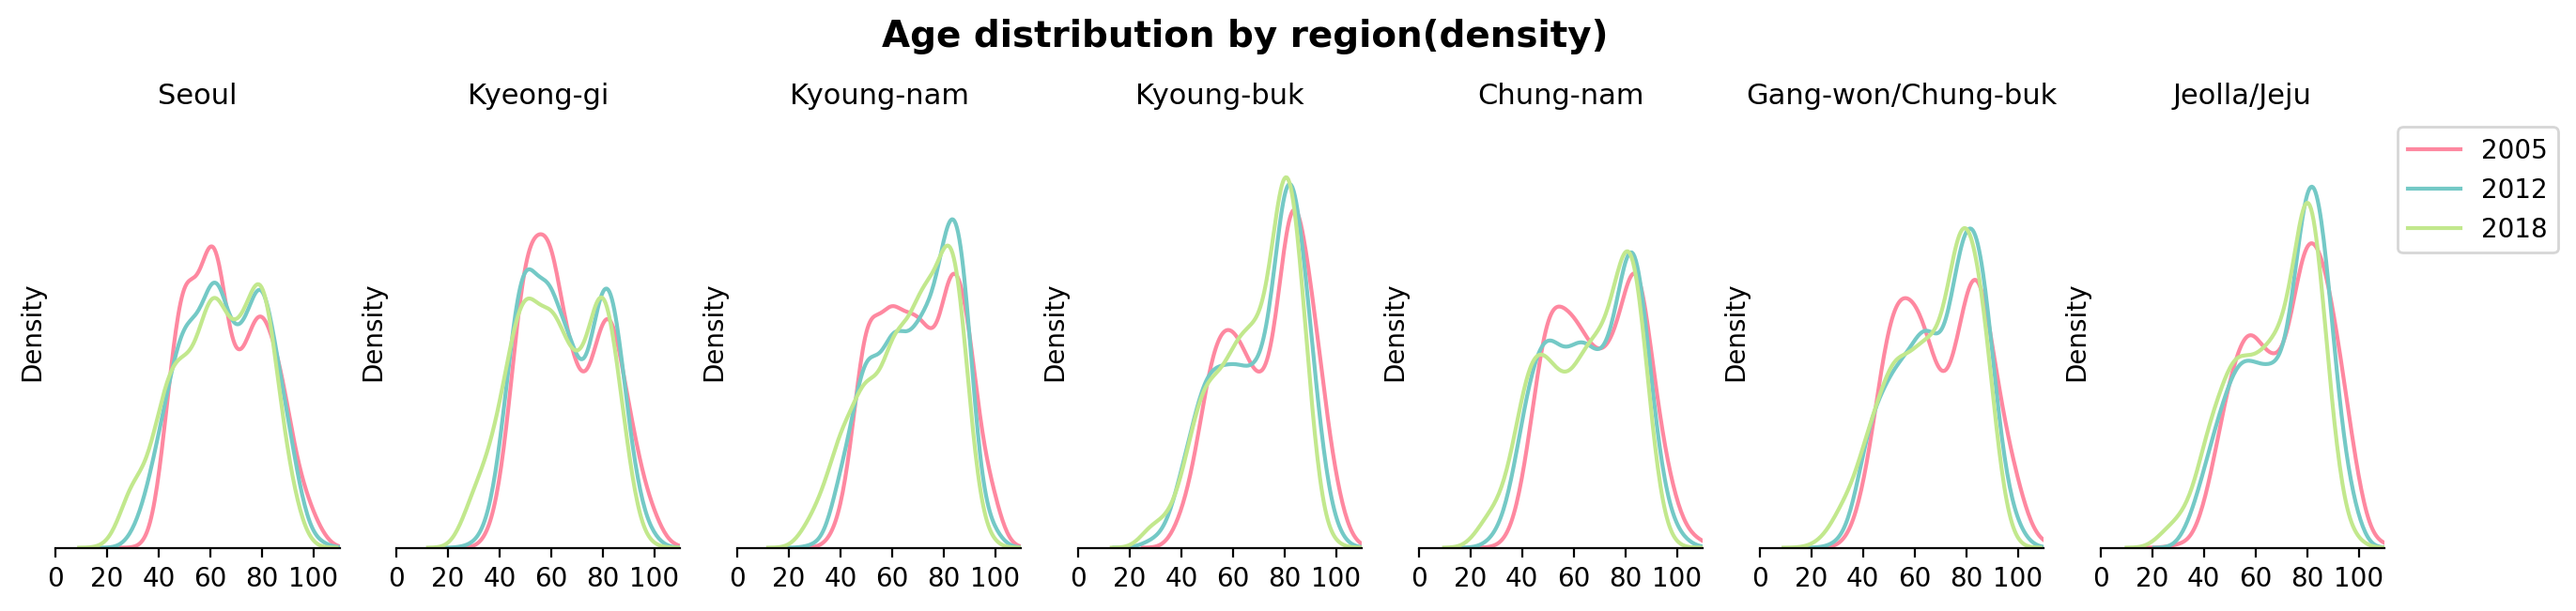

In [10]:
# Age distribution by region


def plot_age(indf, region_order, ax, color):
    i = 0
    for idx in region_order:
        val = indf[indf['region'] == idx]['age']
        sns.distplot(val, hist=False, color=color, ax=axes[i], label= ' ')

        axes[i].set_xlabel(idx, fontsize=11, fontweight='light')
        axes[i].set_yticks([])
#         axes[i].set_ylabel(idx, fontsize = 10)

        axes[i].set_xlim(0, 110)
        axes[i].set_ylim(0, 0.035)
        axes[i].set_xticks([0, 20, 40, 60, 80, 100])
        axes[i].xaxis.set_label_position('top')

        for s in ['top', 'left', 'right']:
            axes[i].spines[s].set_visible(False)

#         axes[i].axvline(x = val.mean(), ymin = 0, ymax = 0.8, ls = '--', lw = 0.5, color = color)
#         axes[i].annotate(f"{int(np.round(val.mean()))}",
#                         xy = (val.mean(), 0.03),
#                         va = 'center',
#                         ha = 'center')

        i += 1

colors = ['#fe88a0', '#74c9c6', '#c2e88d']

fig, axes = plt.subplots(1, 7, figsize=(16, 3))

i = 0
for d, c in zip(data, colors):
    plot_age(d, region_order, axes, c)
    i += 1

# Remove legend
for i in range(6):
    plt.setp(axes[i].legend(), visible=False)

fig.text(0.4,1, 'Age distribution by region(density)', fontsize = 14, fontweight = 'bold')
plt.legend(['2005', '2012', '2018'], bbox_to_anchor = (1, 1))
plt.show()


- no education<7 and no education(>=) ratio are decreasing.
- ratio of over university is high in metropolitan area and Chung-nam.
- There is Sejong city, Multifunctional Administrative City in Chung-nam. I think it is one of reason that education level is increasing.

<ipython-input-11-ba6a079d9afc>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(region_ed_ratio.index, rotation=90)
<ipython-input-11-ba6a079d9afc>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(region_ed_ratio.index, rotation=90)
<ipython-input-11-ba6a079d9afc>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(region_ed_ratio.index, rotation=90)


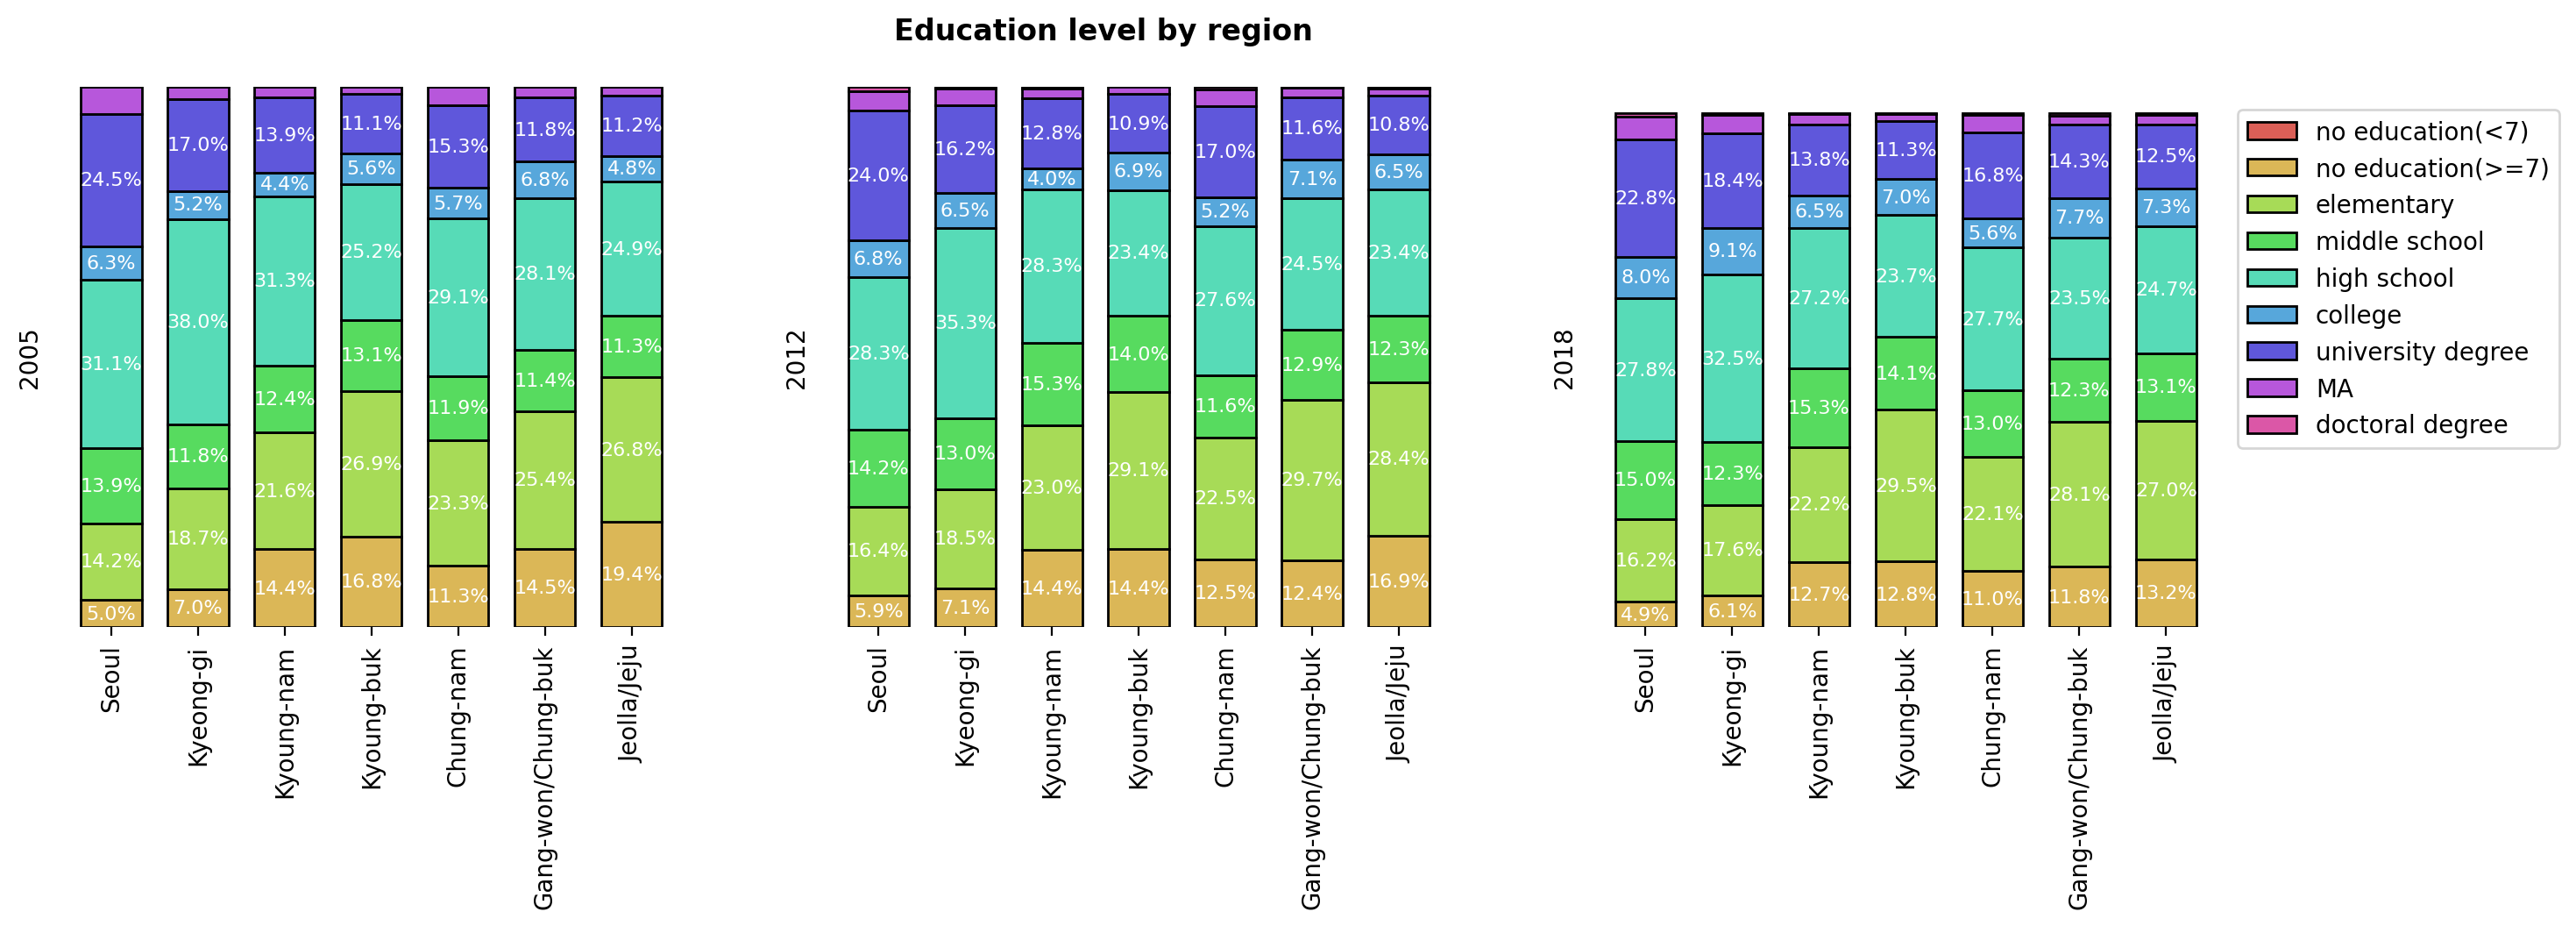

In [11]:
# Education level by region
ed_order = ['no education(<7)', 'no education(>=7)', 'elementary',
            'middle school', 'high school', 'college',
            'university degree', 'MA', 'doctoral degree']


def plot_ed_lv(indf, region_order, ax):

    region_ed = indf.groupby(['region', 'education_level'])[
        'education_level'].count().unstack().reindex(region_order)

    # find missing columns
    if len(set(ed_order) - set(region_ed.columns)) != 0:
        not_include = list(set(ed_order) - set(region_ed.columns))
        region_ed[not_include] = 0

    region_ed_ratio = (region_ed.T / region_ed.sum(axis=1)).T

    # Draw stacked bar plot

    colors = sns.color_palette('hls', n_colors=len(ed_order))

    i = 0
    for idx, color in zip(ed_order, colors):
        ax.bar(region_ed_ratio.index,
               region_ed_ratio[idx], width=0.7, edgecolor='black', bottom=i, label=idx, color=color)

        # annotation part of ed_order
        for ro in region_order:
            if idx in ['no education(>=7)', 'elementary', 'middle school', 'high school', 'college', 'university degree']:

                ax.annotate(f"{region_ed_ratio[idx][ro] * 100 :.1f}%",
                            xy=(ro, region_ed_ratio[idx][ro]/2 + i[ro]),
                            va='center',
                            ha='center',
                            color='white',
                            fontsize=8)
        i += region_ed_ratio[idx]

    ax.set_yticks([])
    ax.set_xticklabels(region_ed_ratio.index, rotation=90)
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
i = 0
for d in data:
    plot_ed_lv(d, region_order, axes[i])
    i += 1
axes[2].legend(bbox_to_anchor=(1, 0.98))
axes[0].set_ylabel('2005')
axes[1].set_ylabel('2012')
axes[2].set_ylabel('2018')

fig.suptitle('Education level by region', fontsize=12, fontweight='bold')
plt.show()

- ratio of single-person households have increased in all regions.
- But ratio of multi-family members of 3 or more have decreased.

<ipython-input-12-842aa30d2f11>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(region_family_ratio.index)
<ipython-input-12-842aa30d2f11>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(region_family_ratio.index)
<ipython-input-12-842aa30d2f11>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(region_family_ratio.index)


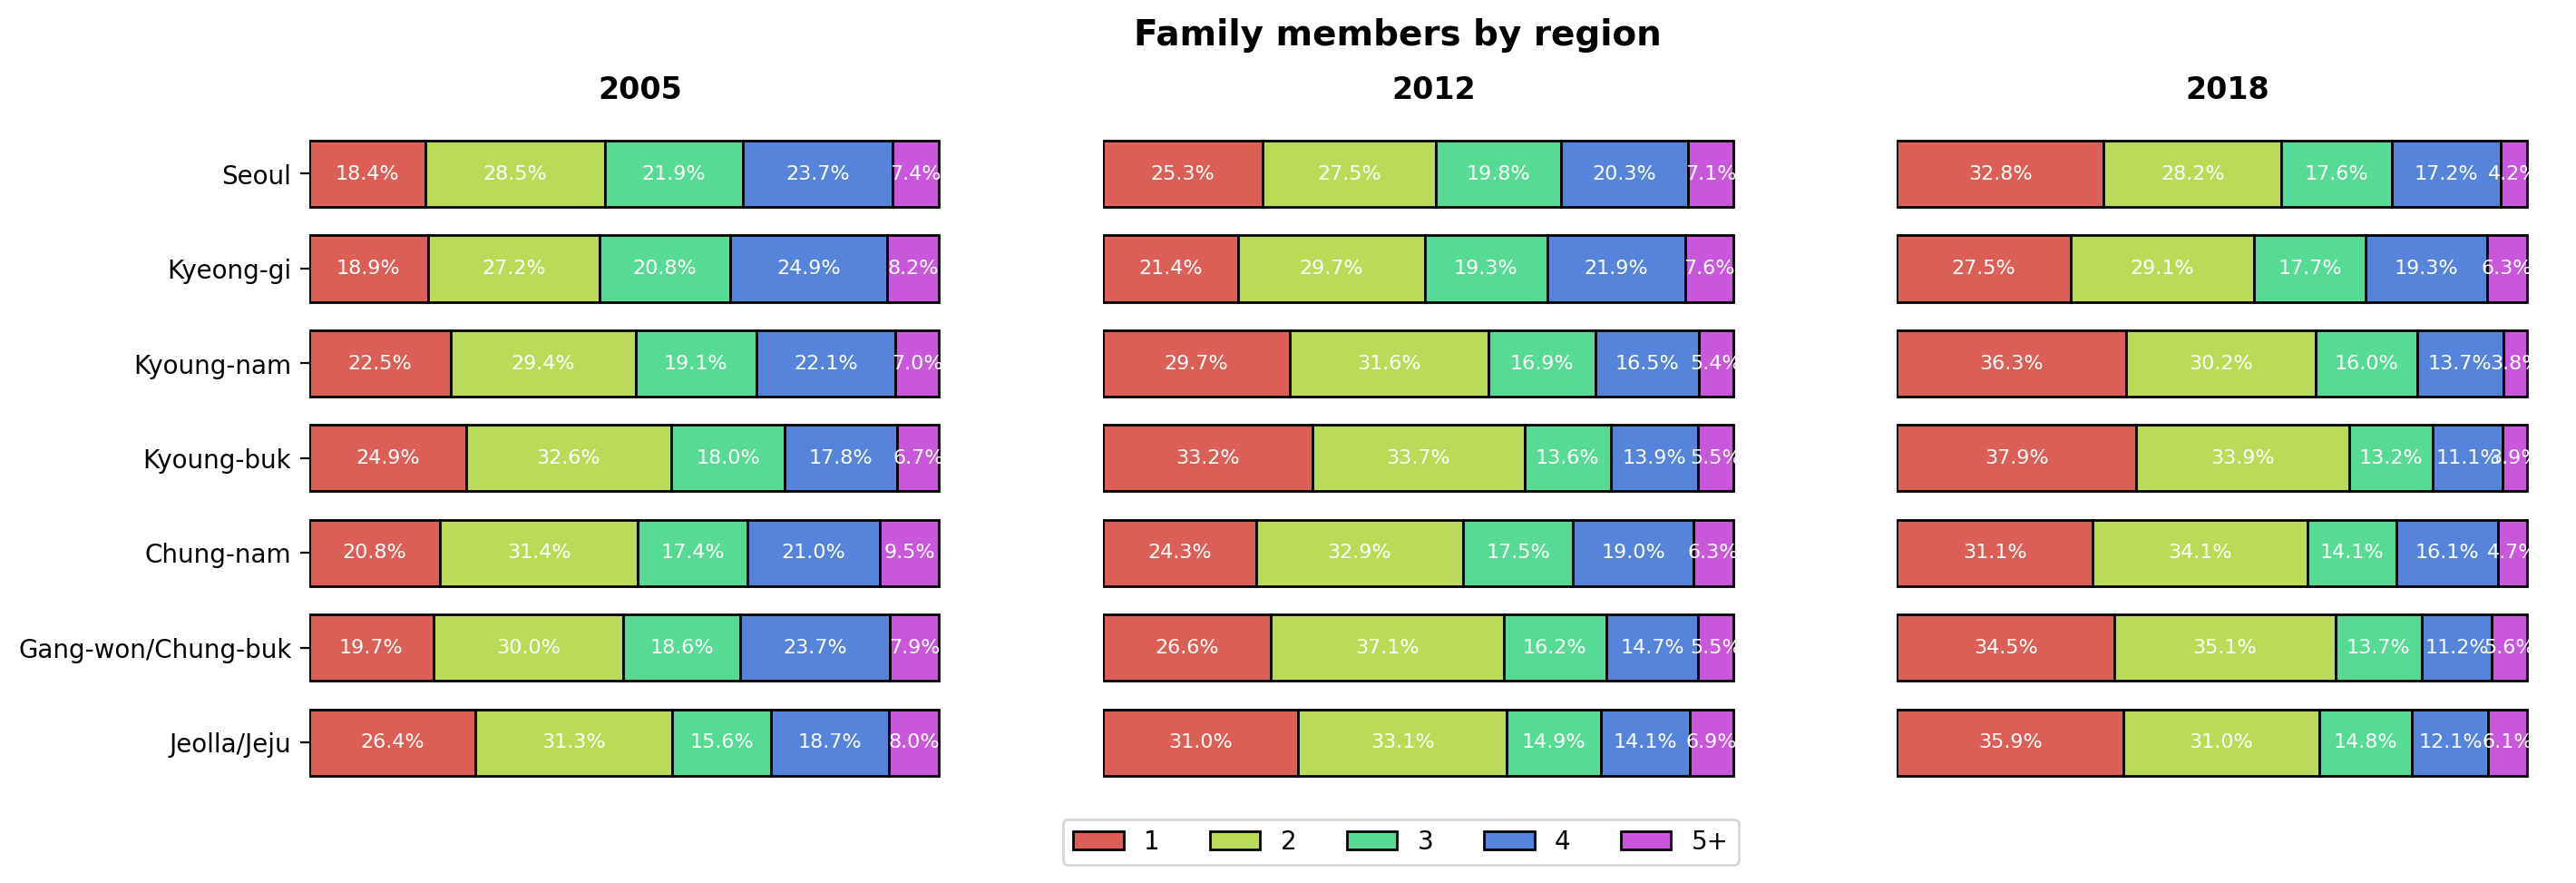

In [12]:
# Family member
def plot_family(indf, region_order, ax):

    region_family = indf.groupby(['region', 'family_member'])[
        'family_member'].count().unstack().reindex(region_order)[::-1]
    region_family_ratio = (region_family.T / region_family.sum(axis=1)).T

    # Draw stacked bar plot
    colors = sns.color_palette('hls', n_colors=len(region_family.columns))

    #i = 0
    i = pd.Series(data=[0 for _ in range(len(region_order))],
                  index=region_order[::-1])

    for col, color in zip(region_family_ratio.columns, colors):
        ax.barh(region_family_ratio.index,
                region_family_ratio[col], height=0.7, edgecolor='black', left=i, label=col, color=color)
        for ro in region_order:
            ax.annotate(f"{region_family_ratio[col][ro] * 100:.1f}%",
                        xy=(i[ro] + region_family_ratio[col][ro] / 2, ro),
                        va='center',
                        ha='center',
                        fontsize=8,
                        color='white')
        i += region_family_ratio[col]

    ax.set_xticks([])
    ax.set_yticklabels(region_family_ratio.index)
    ax.xaxis.set_label_position('top')
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_family(d, region_order, axes[i])
    i += 1

axes[1].legend(loc='lower center', bbox_to_anchor=(0.45, -0.1), ncol=5)
axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])

fig.suptitle('Family members by region', fontsize=14, fontweight='bold')
plt.show()

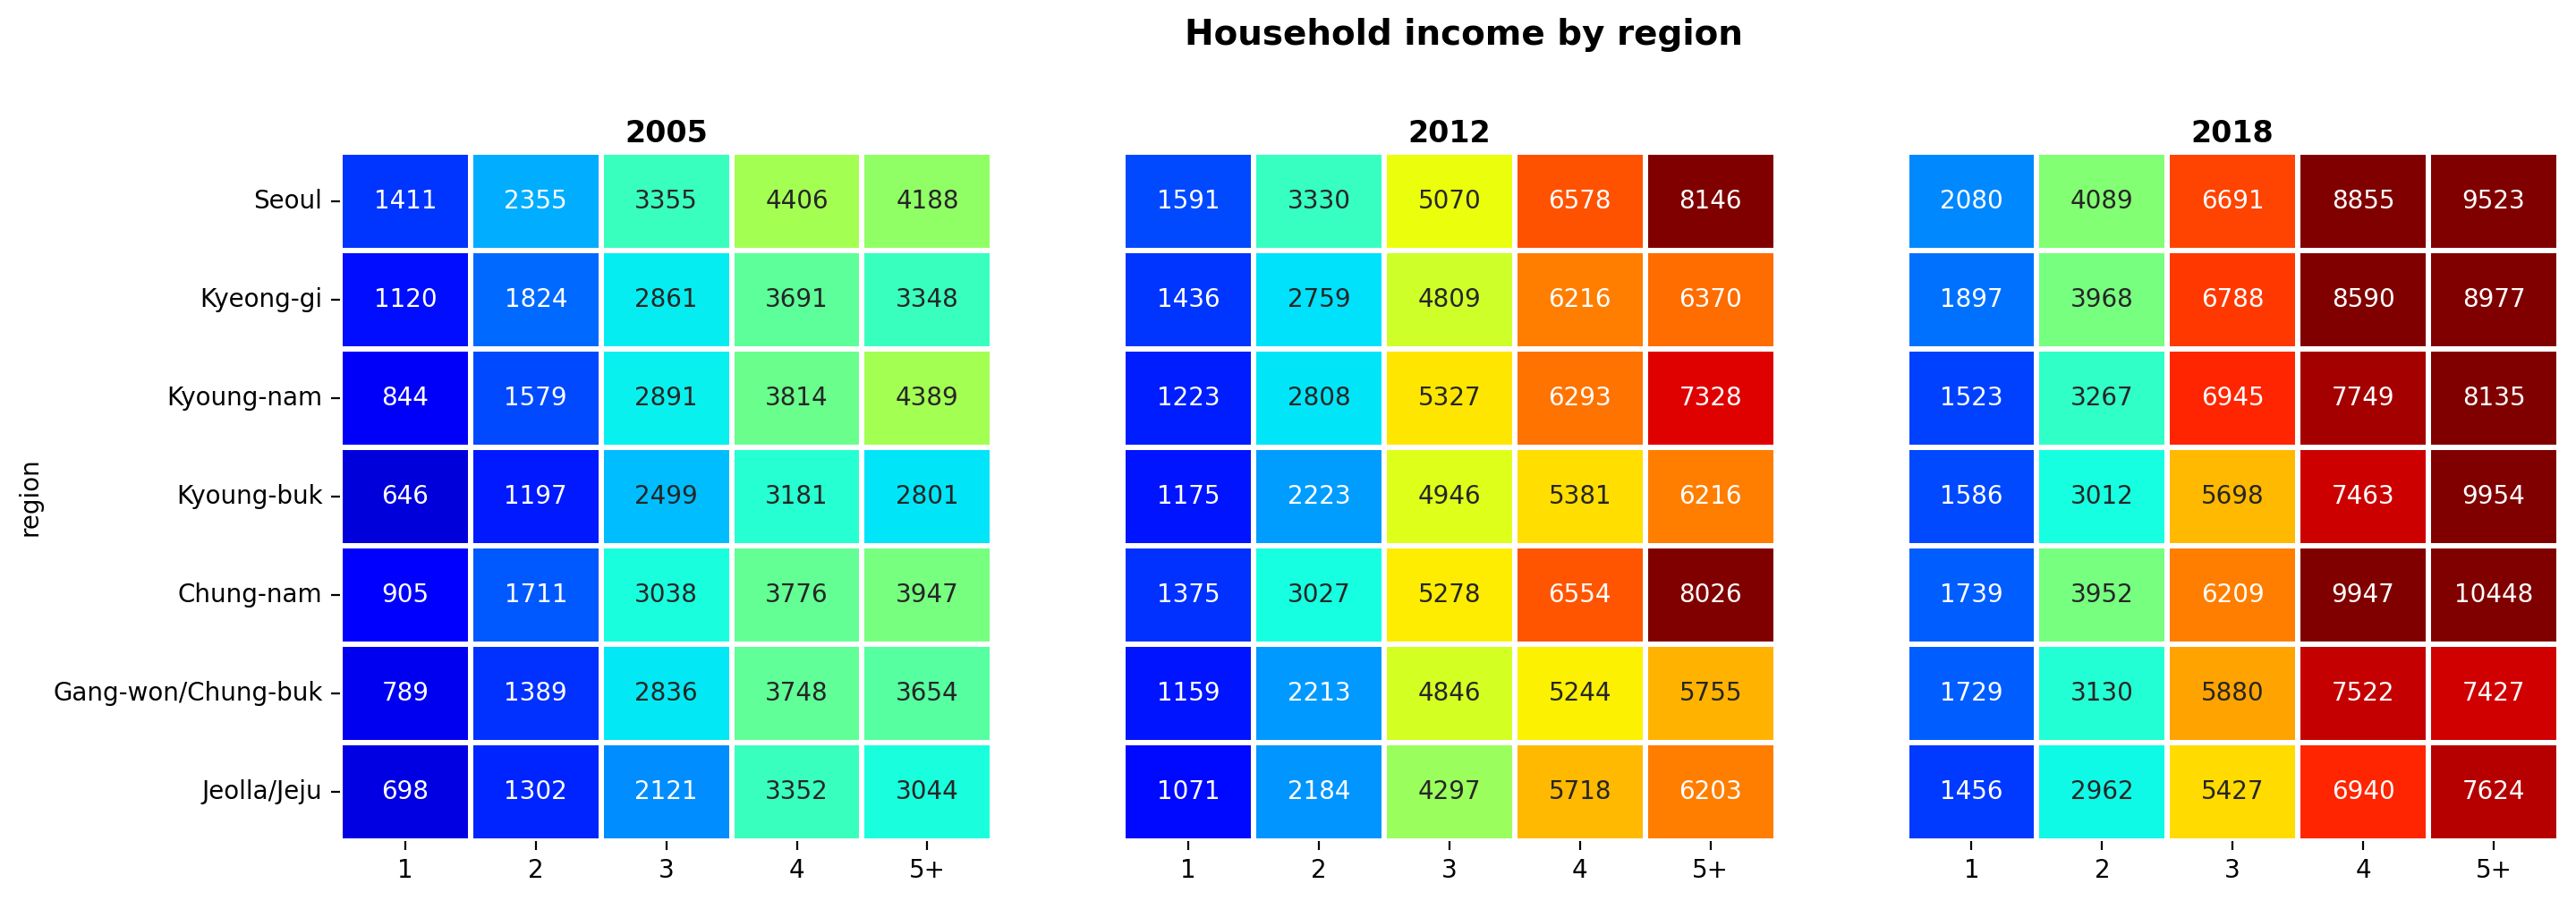

In [13]:
# average yearly income

def plot_income(indf, region_order, ax):
    # not include income < 0
    # It means Null or doubt
    region_income = indf[indf['income'] > 0].groupby(['region', 'family_member'])[
        'income'].mean().unstack().reindex(region_order).astype(int)
    sns.heatmap(region_income, vmin=0, vmax=8000, annot=True,
                fmt='d', ax=ax, cmap='jet', cbar=False, lw=2)
    ax.xaxis.set_label_position('top')

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

i = 0
for d in data:
    plot_income(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.42, 1, 'Household income by region', fontsize=14, fontweight='bold')
plt.show()

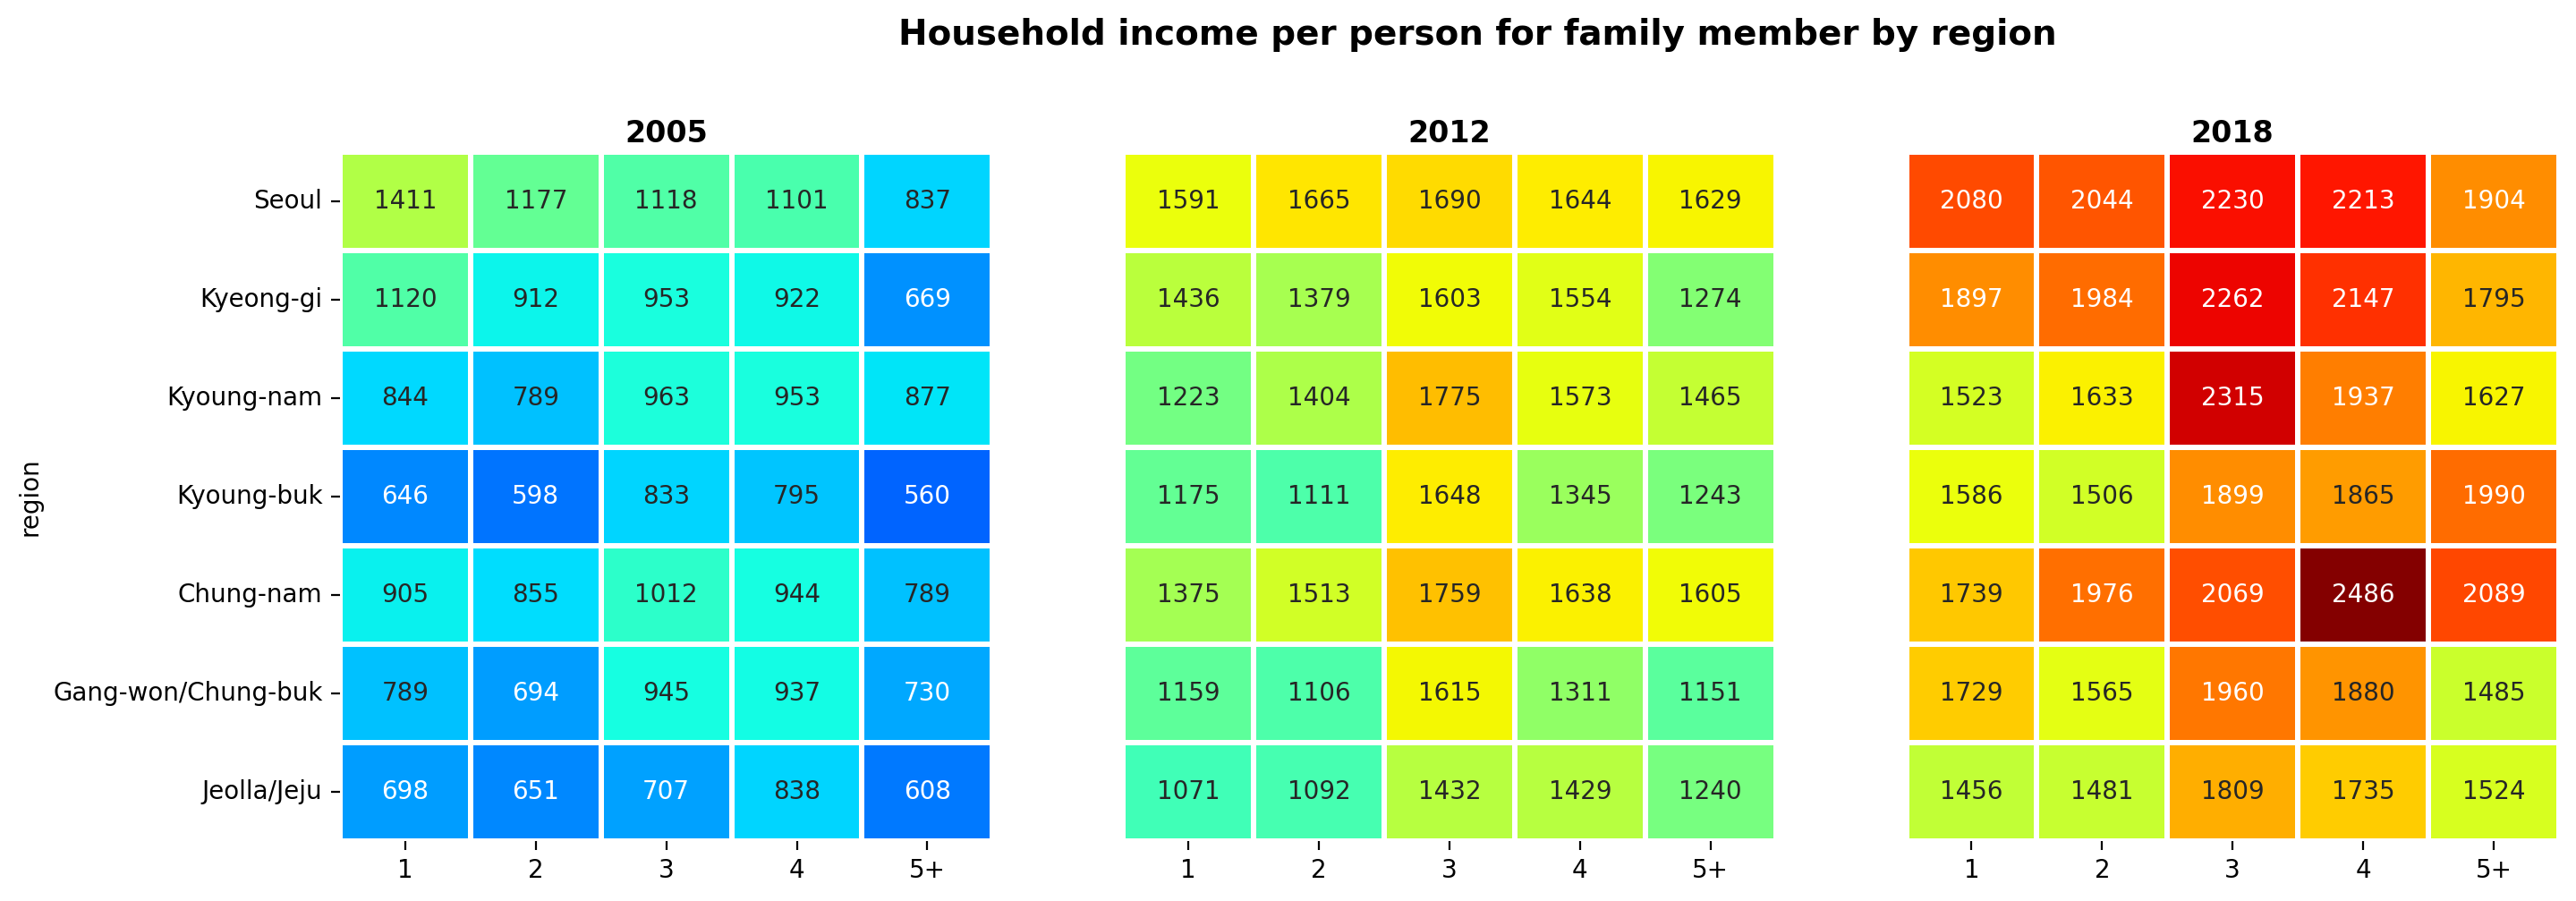

In [16]:
# average yearly income per person for family member

def plot_income_per_person(indf, region_order, ax):
    region_income = indf[indf['income'] > 0].groupby(['region', 'family_member'])[
        'income'].mean().unstack().reindex(region_order)

    z = 1
    for col in region_income.columns:
        region_income.loc[:, col] = (region_income[col] / z).astype(int)
        z += 1

    sns.heatmap(region_income, vmin=0, vmax=2500, annot=True,
                fmt='g', ax=ax, cmap='jet', cbar=False, lw=2)
    ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_income_per_person(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.32, 1, 'Household income per person for family member by region',
         fontsize=14, fontweight='bold')
plt.show()

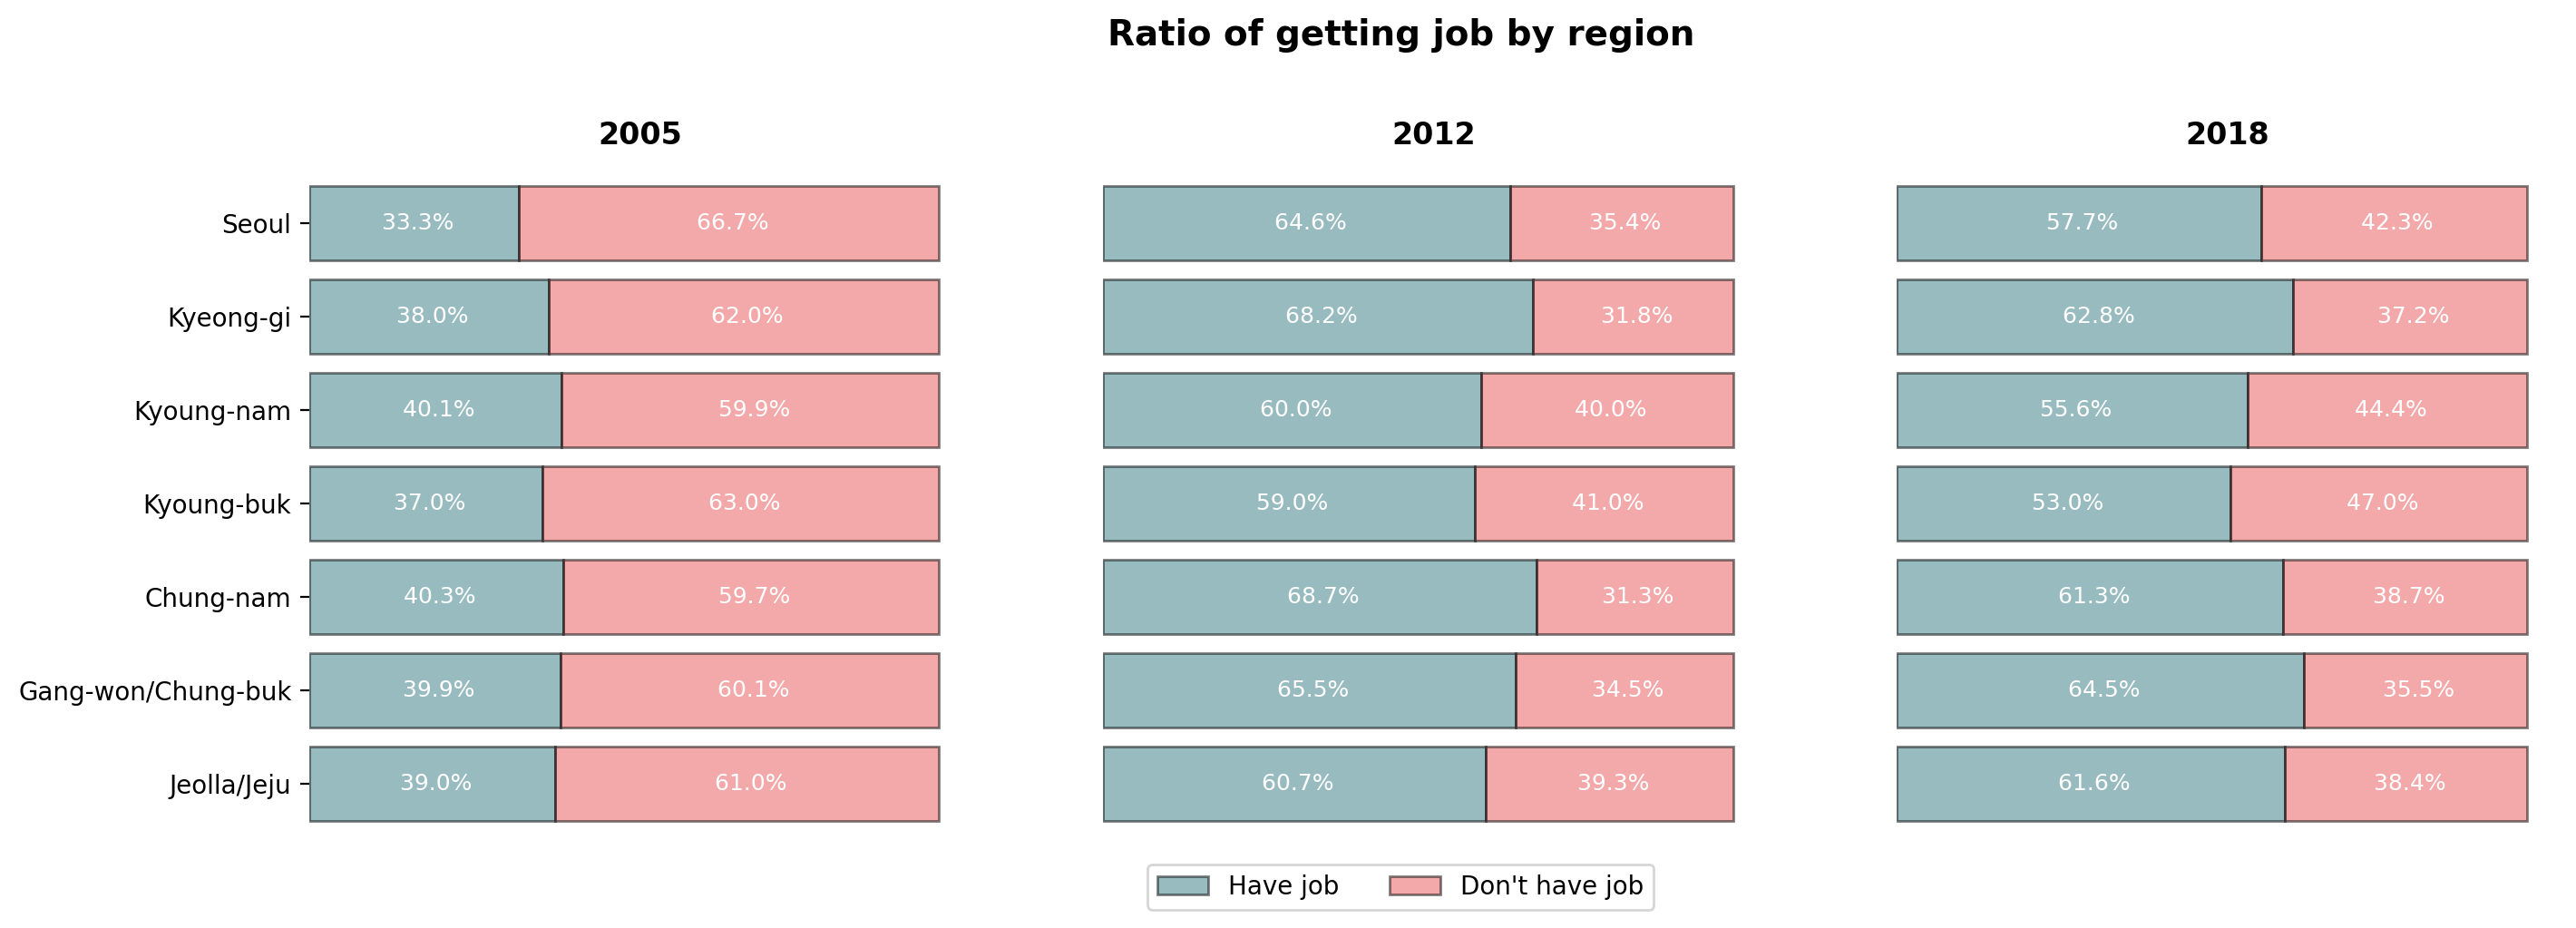

In [17]:
# Getting job


def plot_getting_job(indf, region_order, ax):

    region_job = indf.groupby(['region', 'getting job'])[
        'getting job'].count().unstack().reindex(region_order)[::-1]
    region_ratio = (region_job.T / region_job.sum(axis=1)).T

    ax.barh(region_ratio.index,
            region_ratio[1], label='Have job', edgecolor='black', color='#337882', alpha=0.5)
    ax.barh(region_ratio.index, region_ratio[0], left=region_ratio[1],
            label='Don\'t have job', edgecolor='black', color='#e85255', alpha=0.5)

    for ro in region_order[::-1]:
        ax.annotate(f"{region_ratio[1][ro] * 100 : .1f}%",
                    xy=(region_ratio[1][ro]/2, ro),
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white')
        ax.annotate(f"{region_ratio[0][ro] * 100 : .1f}%",
                    xy=(region_ratio[1][ro] + region_ratio[0][ro]/2, ro),
                    va='center',
                    ha='center',
                    fontsize=9,
                    color='white')

        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        ax.set_xticks([])
        ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(16, 5))
i = 0
for d in data:
    plot_getting_job(d, region_order, axes[i])
    i += 1

axes[1].legend(loc='lower center', bbox_to_anchor=(0.45, -0.1), ncol=5)
axes[0].set_xlabel('2005', fontsize=12, fontweight='bold')
axes[1].set_xlabel('2012', fontsize=12, fontweight='bold')
axes[2].set_xlabel('2018', fontsize=12, fontweight='bold')

axes[1].set_yticks([])
axes[2].set_yticks([])

fig.text(0.40, 1, 'Ratio of getting job by region',
         fontsize=14, fontweight='bold')
plt.show()

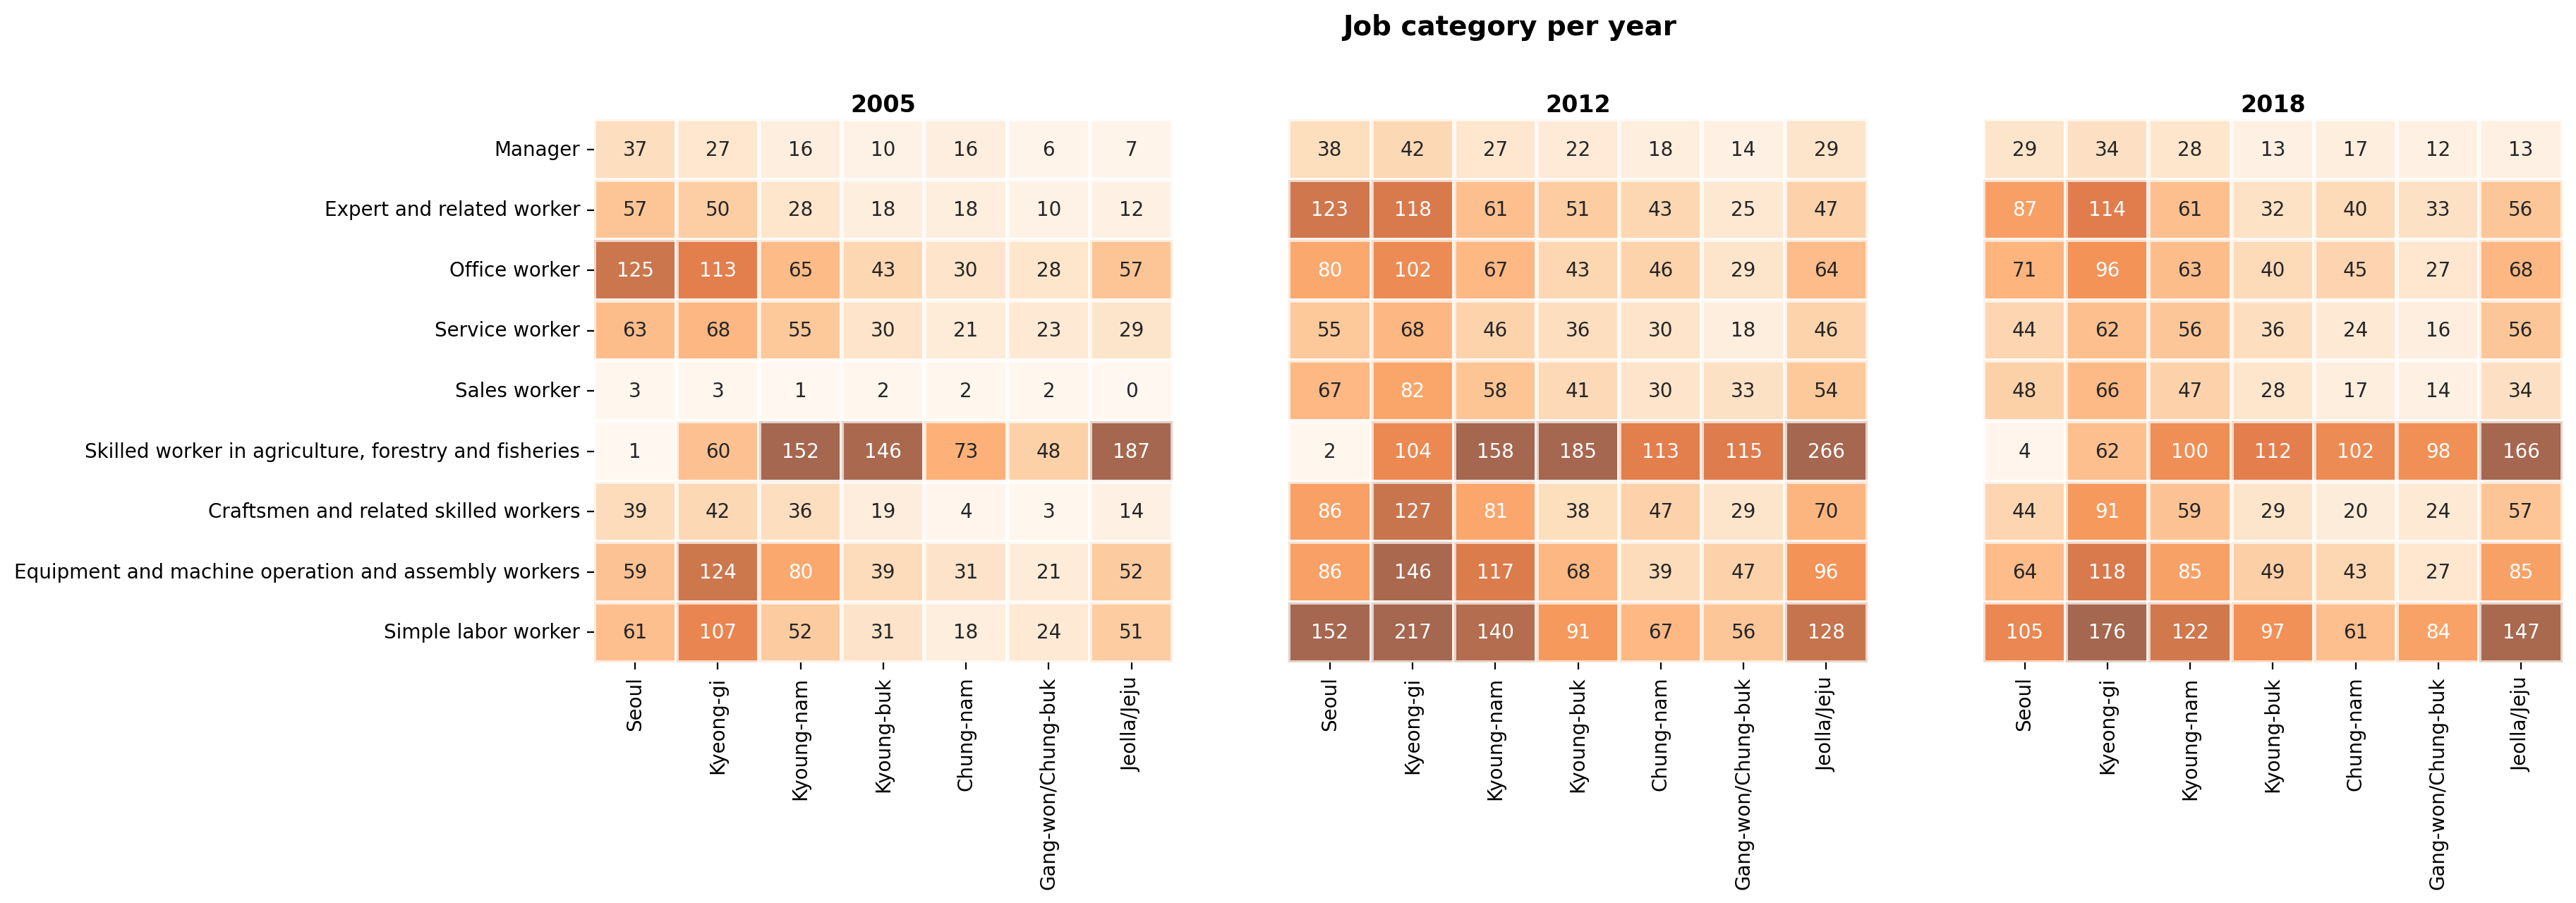

In [18]:
category_order = ['Manager', 'Expert and related worker', 'Office worker',
                  'Service worker', 'Sales worker',
                  'Skilled worker in agriculture, forestry and fisheries',
                  'Craftsmen and related skilled workers',
                  'Equipment and machine operation and assembly workers',
                  'Simple labor worker']    # except for soldier


def plot_job(indf, region_order, ax):
    region_job = indf.groupby(['region', 'Main_category'])['Main_category'].count(
    ).unstack().fillna(0)[category_order].reindex(region_order).astype(int).T

#     diff = list(set(reason_order) - set(region_reason.columns))
#     if len(diff) != 0:
#         region_reason[diff] = 0

    sns.heatmap(region_job, vmin=0, vmax=150, annot=True, fmt='d',
                ax=ax, cmap='Oranges', cbar=False, lw=2, alpha=0.7)
    ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

i = 0
for d in data:
    plot_job(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)

axes[1].set_yticks([])
axes[2].set_yticks([])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.42, 1, 'Job category per year', fontweight='bold', fontsize=14)

plt.show()

<ipython-input-19-50641e6a5e29>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])
<ipython-input-19-50641e6a5e29>:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(region_order, rotation=30)


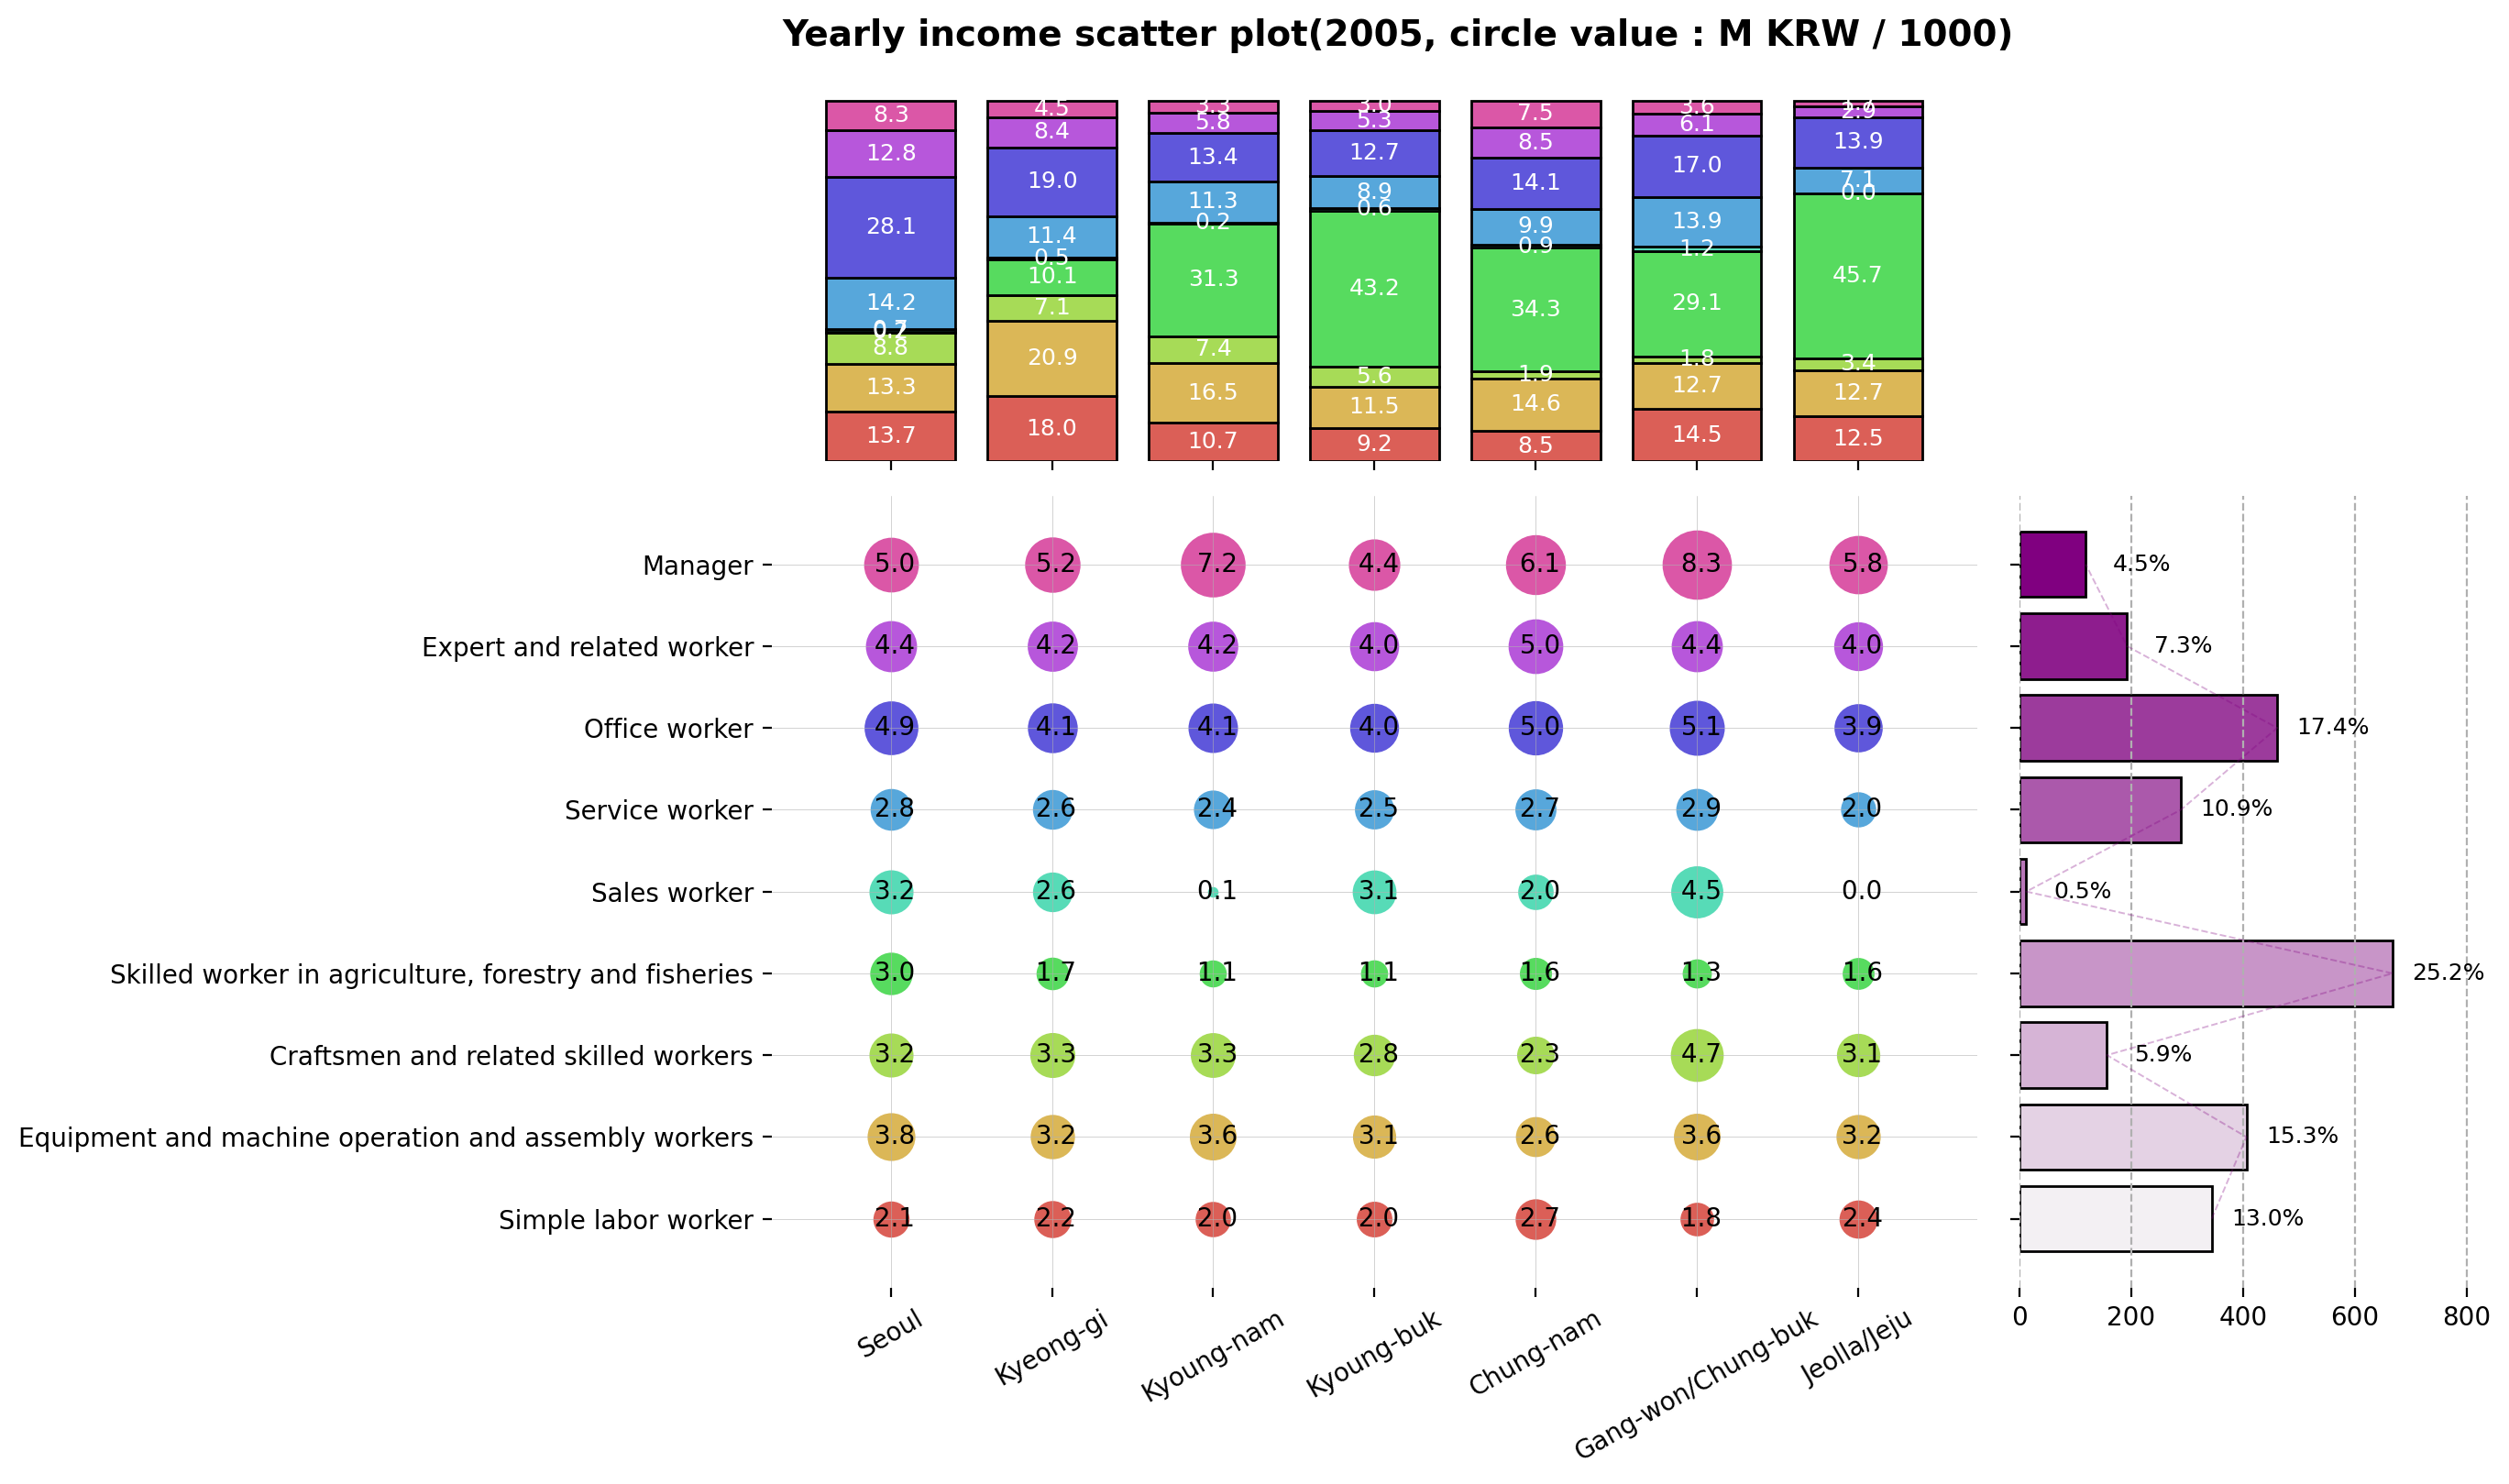

In [19]:
# scatter plot of average yearly income of job category by region
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(7, 7)

# Design plot
ax_scatter = fig.add_subplot(gs[2:-1, :5])
ax_barx = fig.add_subplot(gs[0:2, :5], sharex=ax_scatter)
ax_bary = fig.add_subplot(gs[2:-1, 5:], sharey=ax_scatter)

colors = sns.color_palette('hls', n_colors=len(category_order))

# plot ax_scatter
region_income = df_2005[df_2005['income'] > 0].groupby(
    ['region', 'Main_category'])['income'].mean().unstack().fillna(0).stack()

for i in region_order:
    c_idx = 0
    for j in category_order[::-1]:
        ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])

        c_idx += 1

        ax_scatter.annotate(f"{region_income[i][j] / 1000 : .1f}",
                            xy=(i, j),
                            va='center',
                            ha='center',
                            color='black')

# plot ax_barx
region_job = df_2005.groupby(['region', 'Main_category'])[
    'Main_category'].count().unstack().fillna(0)[category_order][::-1]
region_job_ratio = (region_job.T/region_job.sum(axis=1)
                    ).T.reindex(region_order)

c_idx = 0
i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order)
for col in region_job_ratio.columns[::-1]:
    ax_barx.bar(region_job_ratio.index,
                region_job_ratio[col], bottom=i, edgecolor='black', label=col, color=colors[c_idx])

    for ro in region_order:
        ax_barx.annotate(f"{region_job_ratio[col][ro] * 100 :.1f}",
                         xy=(ro, region_job_ratio[col][ro]/2 + i[ro]),
                         va='center',
                         ha='center',
                         fontsize=9,
                         color='white')
    i += region_job_ratio[col]
    c_idx += 1


# plot ax_bary

job = df_2005['Main_category'].value_counts()[category_order][::-1]

ax_bary.barh(job.index, job, edgecolor='black',
             color=sns.light_palette('purple', len(job)))
ax_bary.plot(job, job.index, color='purple', ls='--', alpha=0.3, lw=0.7)

for idx in job.index:
    ax_bary.annotate(f"{job[idx] /job.sum() * 100 :.1f}%",
                     xy=(job[idx] + 100, idx),
                     va='center',
                     ha='center',
                     fontsize=9,
                     color='black')

# set graph

for s in ['top', 'right', 'left', 'bottom']:
    ax_scatter.spines[s].set_visible(False)
    ax_barx.spines[s].set_visible(False)
    ax_bary.spines[s].set_visible(False)

# ax_scatter
ax_scatter.grid('--', lw=0.2)
ax_scatter.set_xticklabels(region_order, rotation=30)

# ax_barx
ax_barx.set_yticks([])

# ax_bary
ax_bary.grid(axis='x', ls='--')
ax_bary.set_xlim(0, job.max() + 150)

plt.setp(ax_barx.get_xticklabels(), visible=False)
plt.setp(ax_bary.get_yticklabels(), visible=False)

fig.text(0.13, 0.9, 'Yearly income scatter plot(2005, circle value : M KRW / 1000)',
         fontsize=14, fontweight='bold')
plt.show()

<ipython-input-20-edca95d90dc9>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])
<ipython-input-20-edca95d90dc9>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(region_order, rotation=30)


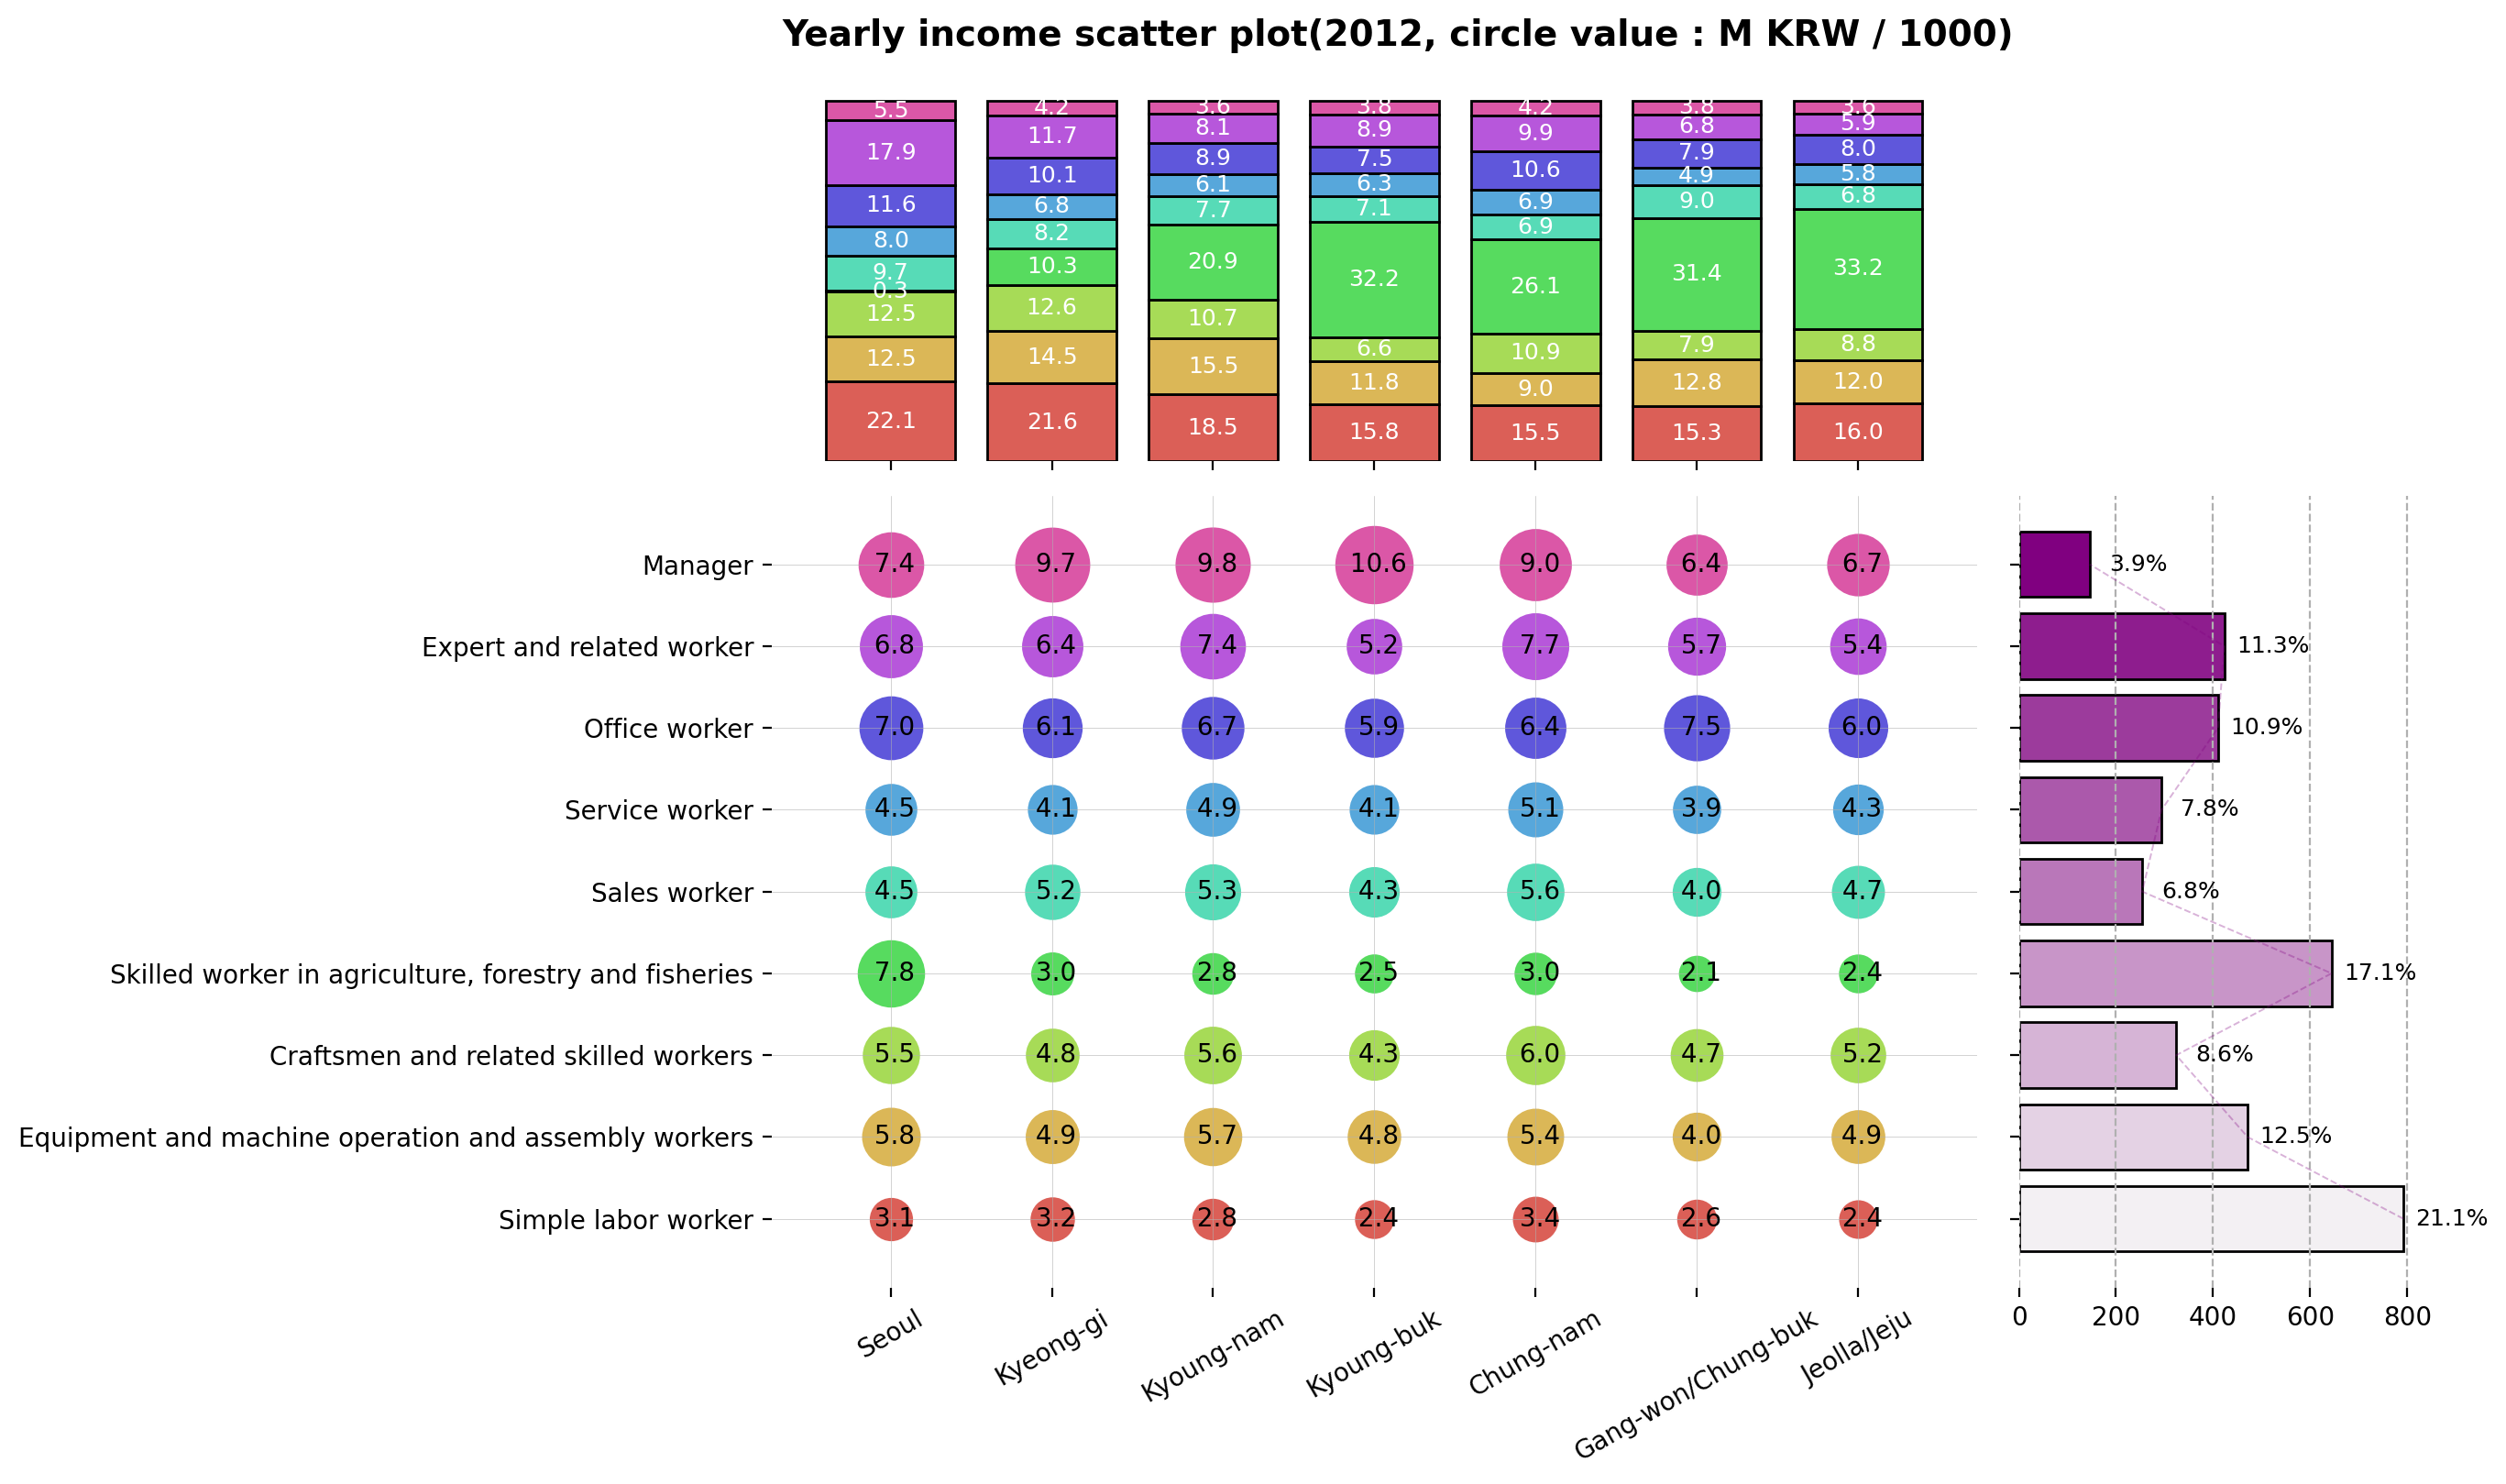

In [20]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(7, 7)

# Design plot
ax_scatter = fig.add_subplot(gs[2:-1, :5])
ax_barx = fig.add_subplot(gs[0:2, :5], sharex=ax_scatter)
ax_bary = fig.add_subplot(gs[2:-1, 5:], sharey=ax_scatter)

colors = sns.color_palette('hls', n_colors=len(category_order))

# plot ax_scatter
region_income = df_2012[df_2012['income'] > 0].groupby(
    ['region', 'Main_category'])['income'].mean().unstack().fillna(0).stack()

for i in region_order:
    c_idx = 0
    for j in category_order[::-1]:
        ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])

        c_idx += 1

        ax_scatter.annotate(f"{region_income[i][j] / 1000 : .1f}",
                            xy=(i, j),
                            va='center',
                            ha='center',
                            color='black')

# plot ax_barx
region_job = df_2012.groupby(['region', 'Main_category'])[
    'Main_category'].count().unstack().fillna(0)[category_order][::-1]
region_job_ratio = (region_job.T/region_job.sum(axis=1)
                    ).T.reindex(region_order)

c_idx = 0
i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order)
for col in region_job_ratio.columns[::-1]:
    ax_barx.bar(region_job_ratio.index,
                region_job_ratio[col], bottom=i, edgecolor='black', label=col, color=colors[c_idx])

    for ro in region_order:
        ax_barx.annotate(f"{region_job_ratio[col][ro] * 100 :.1f}",
                         xy=(ro, region_job_ratio[col][ro]/2 + i[ro]),
                         va='center',
                         ha='center',
                         fontsize=9,
                         color='white')
    i += region_job_ratio[col]
    c_idx += 1

# plot ax_bary

job = df_2018['Main_category'].value_counts()[category_order][::-1]

ax_bary.barh(job.index, job, edgecolor='black',
             color=sns.light_palette('purple', len(job)))
ax_bary.plot(job, job.index, color='purple', ls='--', alpha=0.3, lw=0.7)

for idx in job.index:
    ax_bary.annotate(f"{job[idx] /job.sum() * 100 :.1f}%",
                     xy=(job[idx] + 100, idx),
                     va='center',
                     ha='center',
                     fontsize=9,
                     color='black')


# set graph

for s in ['top', 'right', 'left', 'bottom']:
    ax_scatter.spines[s].set_visible(False)
    ax_barx.spines[s].set_visible(False)
    ax_bary.spines[s].set_visible(False)

# ax_scatter
ax_scatter.grid('--', lw=0.2)
ax_scatter.set_xticklabels(region_order, rotation=30)

# ax_barx
ax_barx.set_yticks([])

# ax_bary
ax_bary.grid(axis='x', ls='--')
ax_bary.set_xlim(0, job.max() + 150)

plt.setp(ax_barx.get_xticklabels(), visible=False)
plt.setp(ax_bary.get_yticklabels(), visible=False)

fig.text(0.13, 0.9, 'Yearly income scatter plot(2012, circle value : M KRW / 1000)',
         fontsize=14, fontweight='bold')
plt.show()

<ipython-input-21-b772739f3190>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])
<ipython-input-21-b772739f3190>:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(region_order, rotation=30)


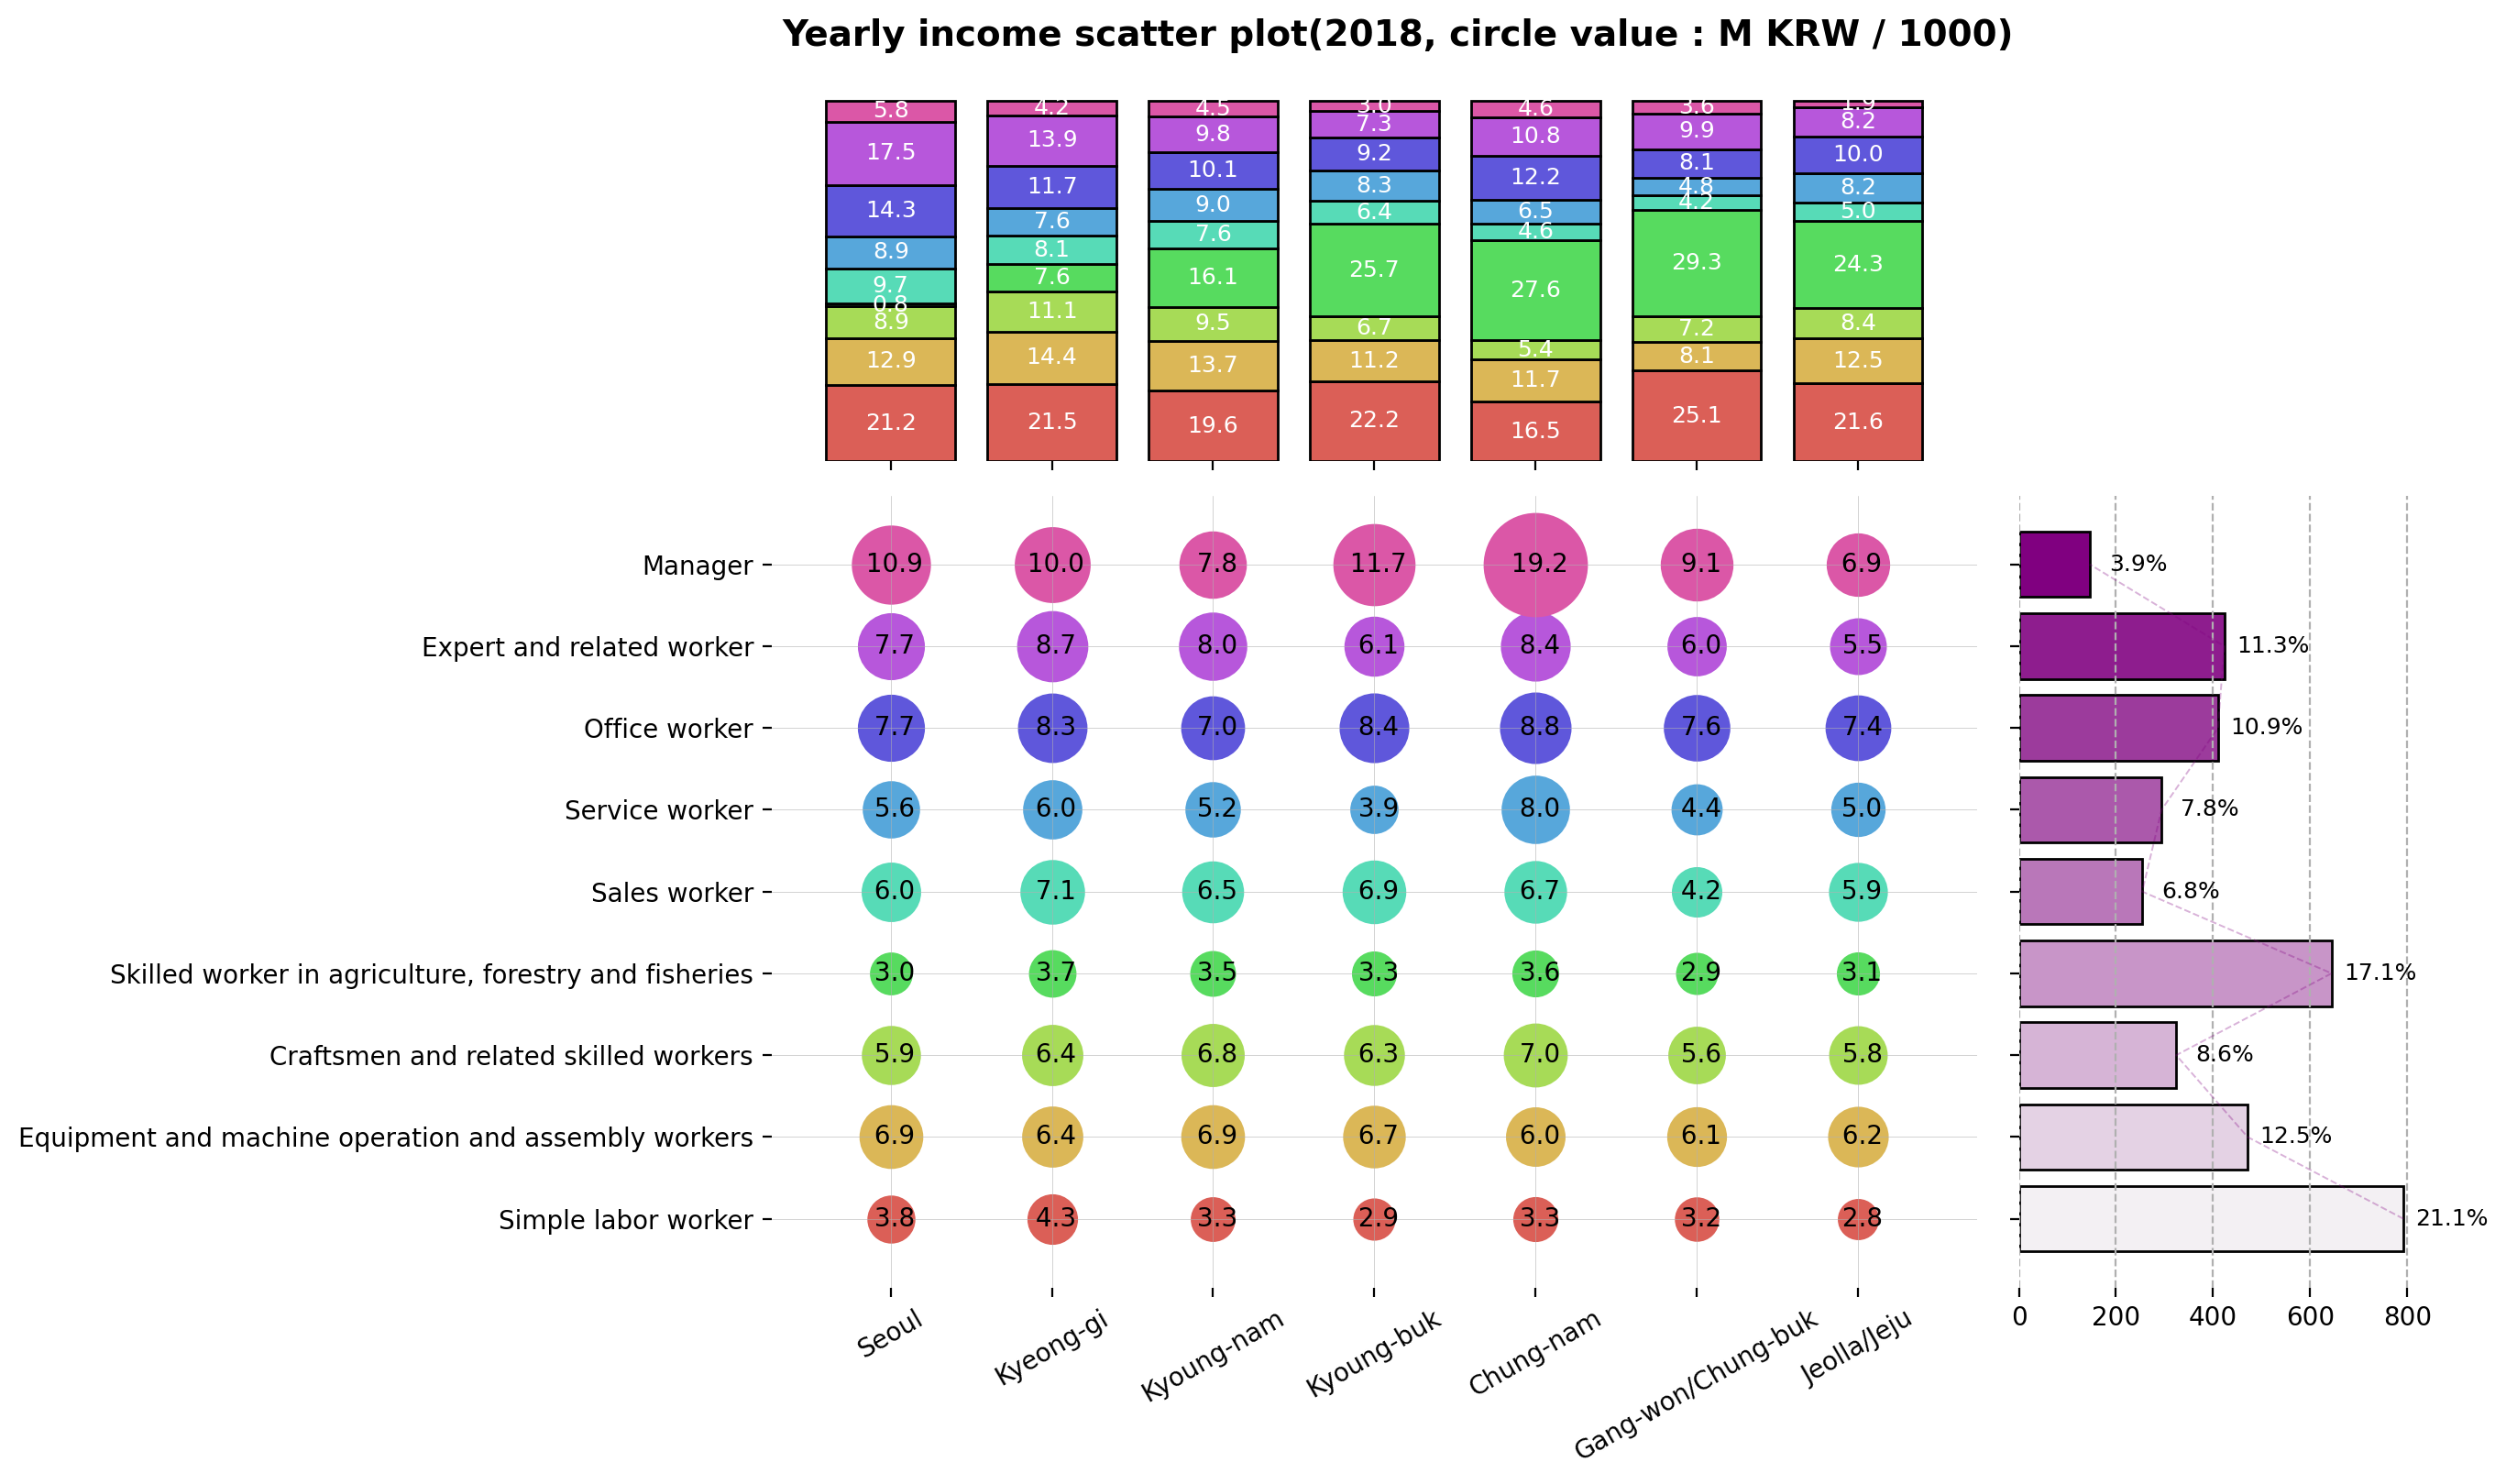

In [21]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(7, 7)

# Design plot
ax_scatter = fig.add_subplot(gs[2:-1, :5])
ax_barx = fig.add_subplot(gs[0:2, :5], sharex=ax_scatter)
ax_bary = fig.add_subplot(gs[2:-1, 5:], sharey=ax_scatter)

colors = sns.color_palette('hls', n_colors=len(category_order))

# plot ax_scatter
region_income = df_2018[df_2018['income'] > 0].groupby(
    ['region', 'Main_category'])['income'].mean().unstack().fillna(0).stack()

for i in region_order:
    c_idx = 0
    for j in category_order[::-1]:
        ax_scatter.scatter(i, j, region_income[i][j] / 12, c=colors[c_idx])

        c_idx += 1

        ax_scatter.annotate(f"{region_income[i][j] / 1000 : .1f}",
                            xy=(i, j),
                            va='center',
                            ha='center',
                            color='black')

# plot ax_barx
region_job = df_2018.groupby(['region', 'Main_category'])[
    'Main_category'].count().unstack().fillna(0)[category_order][::-1]
region_job_ratio = (region_job.T/region_job.sum(axis=1)
                    ).T.reindex(region_order)

c_idx = 0
i = pd.Series(data=[0 for _ in range(len(region_order))], index=region_order)
for col in region_job_ratio.columns[::-1]:
    ax_barx.bar(region_job_ratio.index,
                region_job_ratio[col], bottom=i, edgecolor='black', label=col, color=colors[c_idx])

    for ro in region_order:
        ax_barx.annotate(f"{region_job_ratio[col][ro] * 100 :.1f}",
                         xy=(ro, region_job_ratio[col][ro]/2 + i[ro]),
                         va='center',
                         ha='center',
                         fontsize=9,
                         color='white')
    i += region_job_ratio[col]
    c_idx += 1


# plot ax_bary

job = df_2018['Main_category'].value_counts()[category_order][::-1]

ax_bary.barh(job.index, job, edgecolor='black',
             color=sns.light_palette('purple', len(job)))
ax_bary.plot(job, job.index, color='purple', ls='--', alpha=0.3, lw=0.7)

for idx in job.index:
    ax_bary.annotate(f"{job[idx] /job.sum() * 100 :.1f}%",
                     xy=(job[idx] + 100, idx),
                     va='center',
                     ha='center',
                     fontsize=9,
                     color='black')


# set graph

for s in ['top', 'right', 'left', 'bottom']:
    ax_scatter.spines[s].set_visible(False)
    ax_barx.spines[s].set_visible(False)
    ax_bary.spines[s].set_visible(False)

# ax_scatter
ax_scatter.grid('--', lw=0.2)
ax_scatter.set_xticklabels(region_order, rotation=30)

# ax_barx
ax_barx.set_yticks([])

# ax_bary
ax_bary.grid(axis='x', ls='--')
ax_bary.set_xlim(0, job.max() + 150)

plt.setp(ax_barx.get_xticklabels(), visible=False)
plt.setp(ax_bary.get_yticklabels(), visible=False)

fig.text(0.13, 0.9, 'Yearly income scatter plot(2018, circle value : M KRW / 1000)',
         fontsize=14, fontweight='bold')
plt.show()

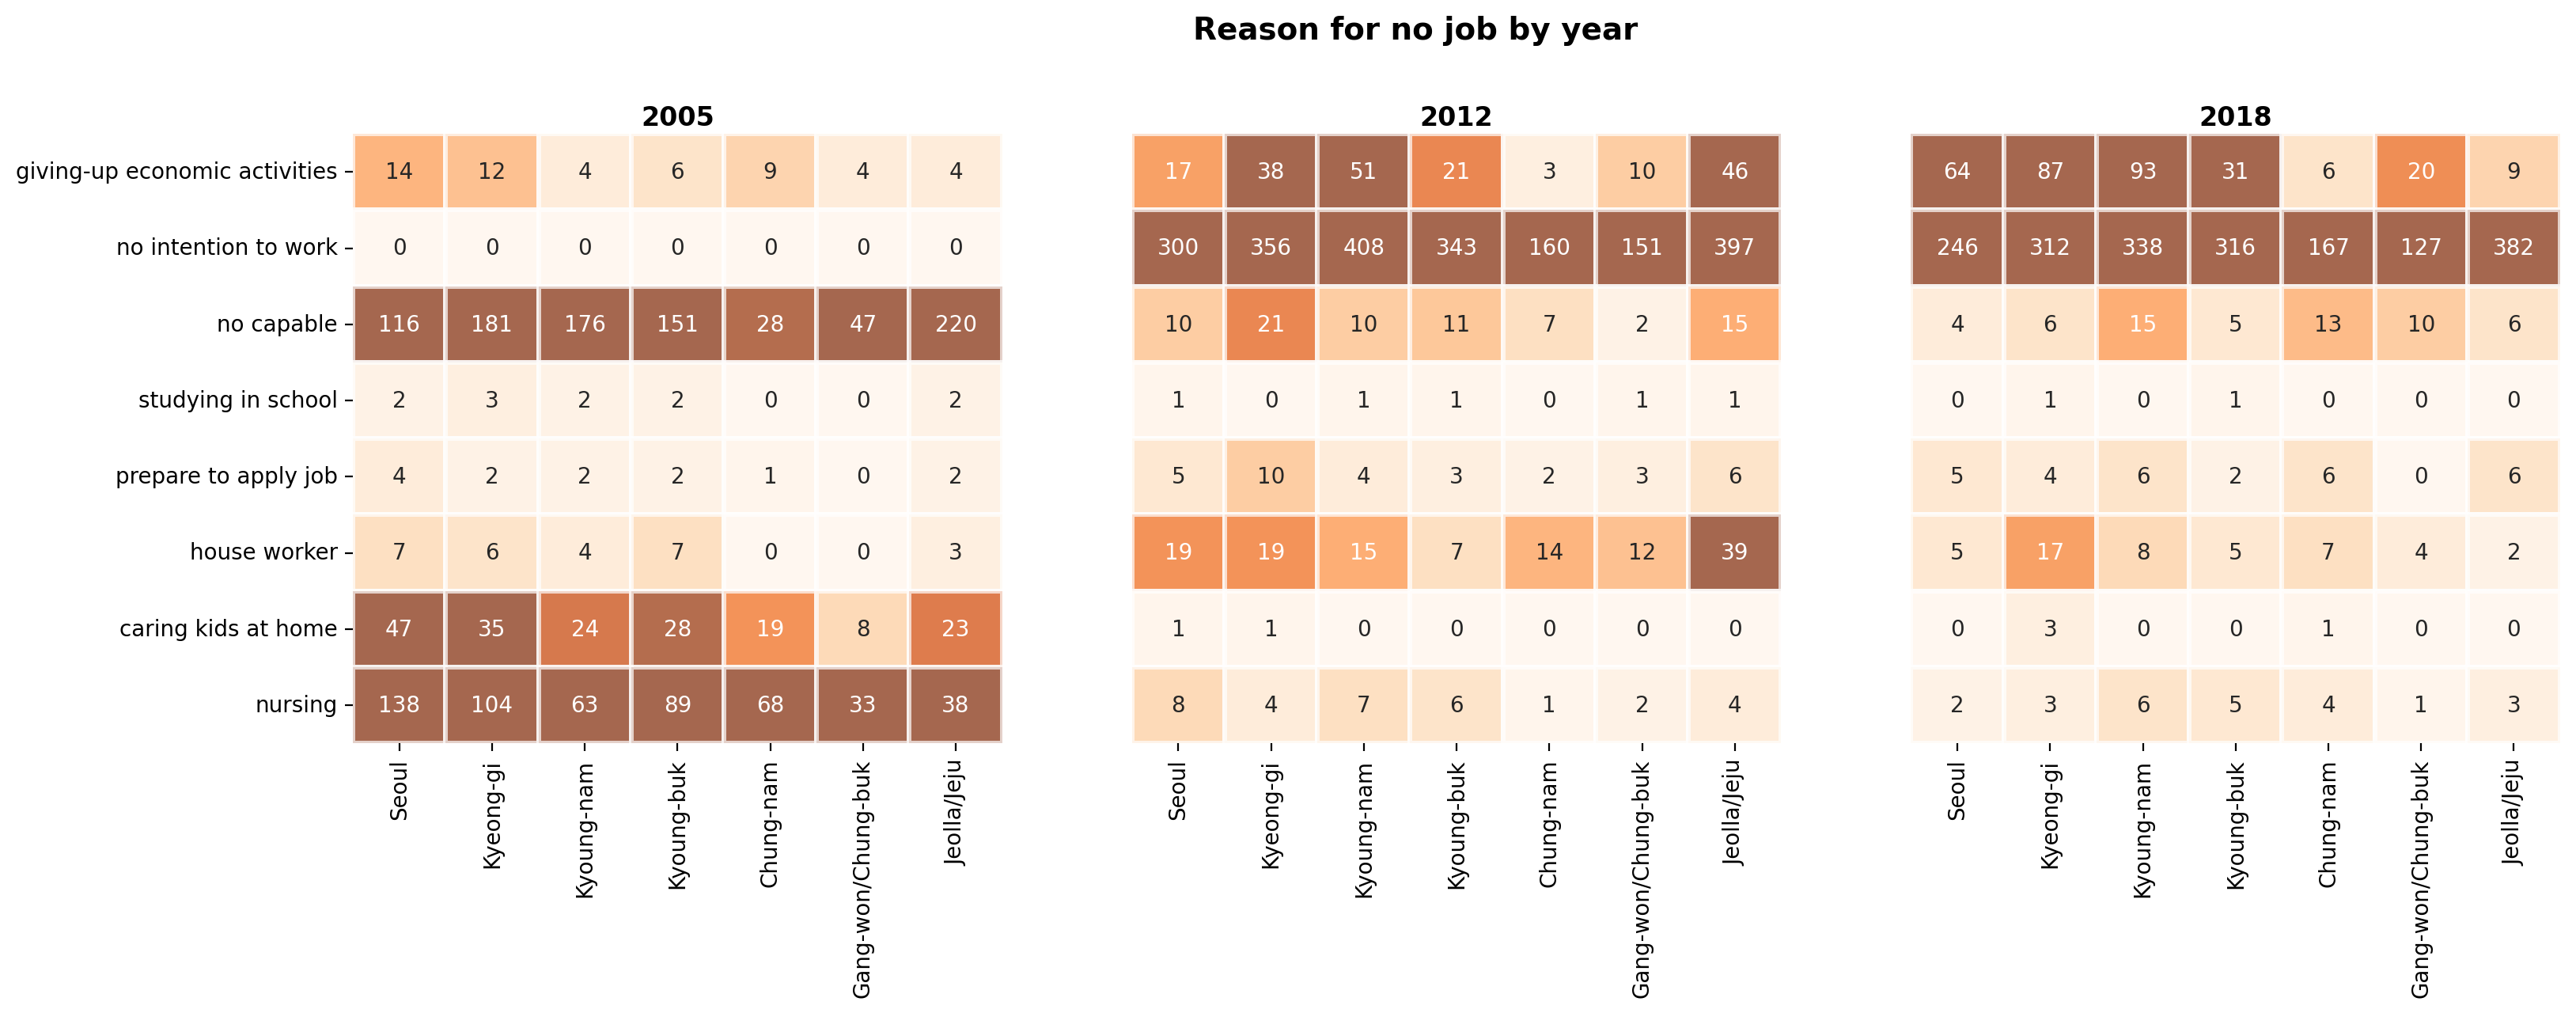

In [22]:
# Reason for no job

# reason_order = ['giving-up economic activities','no intention to work', 'no capable', 'in military service', 'studying in school',
#                 'prepare for school','prepare to apply job', 'house worker','caring kids at home', 'nursing', 'others']

reason_order = ['giving-up economic activities', 'no intention to work', 'no capable', 'studying in school',
                'prepare to apply job', 'house worker', 'caring kids at home', 'nursing']


def plot_reason(indf, region_order, ax):
    region_reason = indf.groupby(['region', 'reason_none_worker'])[
        'reason_none_worker'].count().unstack().fillna(0).reindex(region_order).astype(int)

    diff = list(set(reason_order) - set(region_reason.columns))
    if len(diff) != 0:
        region_reason[diff] = 0

    sns.heatmap(region_reason[reason_order].T, vmin=0, vmax=30, annot=True,
                fmt='d', ax=ax, cmap='Oranges', cbar=False, lw=2, alpha=0.7)
    ax.xaxis.set_label_position('top')


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
i = 0
for d in data:
    plot_reason(d, region_order, axes[i])
    i += 1

axes[0].set_xlabel('2005', fontweight='bold', fontsize=12)
axes[1].set_xlabel('2012', fontweight='bold', fontsize=12)
axes[2].set_xlabel('2018', fontweight='bold', fontsize=12)


axes[1].set_yticks([])
axes[2].set_yticks([])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

fig.text(0.42, 1, 'Reason for no job by year', fontweight='bold', fontsize=14)

plt.show()